TODO:


*   Rolling Mean



In [1028]:
#Library Imports
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from datetime import datetime, timedelta
import time
import numpy as np
from scipy.signal import argrelextrema
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

font = {'family' : 'helvetica',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

In [997]:
#CSV Import
dex_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/dex_data.csv', low_memory=False)
dex_df['date'] = pd.to_datetime(dex_df['date'], '%Y-%m-%d')
stable_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/stable_onchain_data_2021_July2022.csv', low_memory = False)
lend_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/lend_df.csv', low_memory = False)
stable_df = stable_df.sort_values(by=["date"])
stable_df = stable_df.reset_index()

eth_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/token_prices/eth.csv')
#fix_dates(eth_df)
avax_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/token_prices/avax.csv')
#fix_dates(avax_df)
matic_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/token_prices/matic.csv')
#fix_dates(matic_df)

In [987]:
stable_token_list = stable_df.token.unique()
stable_df

,# TXs,Agg. # TXs,Unique Senders,Unique Receivers,Unique Users,Vol (Native),Agg. Vol (Native),Mints (Native),Burns (Native),Supply (Native),token,date,chain,supply_ntv
13848,339.0,339.0,99.0,101.0,114.0,2.807153e+06,2.807153e+06,3.234735e+05,-4.472261e+05,-1.237526e+05,UST,2021-01-01,ethereum,3.861025e+07
8077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,USDC,2021-01-01,avalanche,NaN
1153,458.0,458.0,49.0,53.0,60.0,9.855003e+04,9.855003e+04,2.110000e+03,-4.865931e+02,1.623407e+03,DAI,2021-01-01,polygon,1.623407e+03
2488,2204.0,2204.0,361.0,346.0,387.0,7.401385e-06,7.401385e-06,1.319326e-06,-3.445669e-08,1.284869e-06,USDC,2021-01-01,polygon,1.284869e-06
7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,USDC.e,2021-01-01,avalanche,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,242.0,397957.0,121.0,129.0,167.0,2.045027e+07,6.343403e+10,1.190464e+06,-6.126110e+05,5.723097e+08,TUSD,2022-07-31,ethereum,7.243266e+08
12298,53228.0,10862451.0,18608.0,20050.0,27023.0,7.971286e+09,2.101543e+12,4.679903e+07,-6.965203e+07,7.825803e+09,USDC,2022-07-31,ethereum,3.898391e+10
13272,223.0,718725.0,81.0,104.0,135.0,4.510553e+06,1.120830e+11,2.628478e+05,-2.528377e+05,3.986949e+08,UST,2022-07-31,ethereum,2.005387e+07
6924,12609.0,25320.0,2166.0,2287.0,2878.0,2.719100e+07,6.944544e+07,4.893366e+05,-2.020117e+06,5.174186e+05,USDC.e,2022-07-31,avalanche,5.174186e+05


In [1011]:
dex_df['date'] = pd.to_datetime(dex_df['date'], '%Y-%m-%d')

#stable_date_array = stable_df['date']
#finished_dates = [datetime.today()]*len(stable_date_array)
#for k in range(len(stable_date_array)):
#    finished_dates[k] = datetime.strptime(stable_date_array[k])
    
#stable_df['date'] = finished_dates
    

AssertionError: 

In [214]:
#Data Points to plot
# - Velocity[X], TVL[ ], utilization[ ], supply[X]
# MC = T/V -> V = T/MC

In [215]:
#Velocity
C = 1 #Stablecoin assumed to be $1
T = stable_df['Vol (Native)']
M = stable_df['supply_ntv'] #Monetary supply
stable_df['velocity'] = stable_df['Vol (Native)']/stable_df['supply_ntv']

In [216]:
token_1 = dex_df[(dex_df['token_1'].isin(stable_token_list))]

In [217]:
#THIS DOES NOT WORK AS THE PERCENTAGE BALANCE IS BEING ASSUMED
#TO FIX, NEED THE ACTUAL PRICES OF THE TOKENS 
token_1['token_2_value_USD'] = dex_df['token_1_balance']/0.5
#x*y = k -> k = 0.5, y = k/x

/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/116722455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_1['token_2_value_USD'] = dex_df['token_1_balance']/0.5


In [218]:
FIGSIZE_X = 22
FIGSIZE_Y = 10
Tot = 3
Cols = 2

In [219]:
def plot_by_token(metric,ylim=None):

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(FIGSIZE_X,FIGSIZE_Y))

    chains = ['avalanche','ethereum','polygon']
    #metric = 'supply_ntv'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df.set_index('date', inplace = True)
        temp_df = temp_df.groupby('token')[metric]
        ax = temp_df.plot(ax=fig.add_subplot(Rows,Cols,Position[k]),legend=True)
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.title(curr_chain + ' ' + metric)
        plt.grid()
        plt.ylim(ylim)
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


In [245]:
def plot_agg_stable(metric):

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(FIGSIZE_X,FIGSIZE_Y))

    chains = ['avalanche','ethereum','polygon']
    #metric = '# TXs'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df = temp_df[['date',metric]].groupby('date').agg(['sum']).reset_index()
        ax = temp_df.plot(x = 'date', y=metric,ax=fig.add_subplot(Rows,Cols,Position[k]))
        ax.set_xlabel('Date')
        ax.set_ylabel(metric)
        ax.set_title(curr_chain + ' ' + metric)
        ax.grid()
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


In [1092]:
def concat_data(df, start_dt, end_dt):
    temp_df = df.loc[(df['date'] >= start_dt) & (df['date'] <= end_dt)]
    temp_df = temp_df.reset_index()
    return temp_df

def fix_dates(df):
    df['date']= pd.to_datetime(df['date'])
    df['date'] = df['date'].dt.date

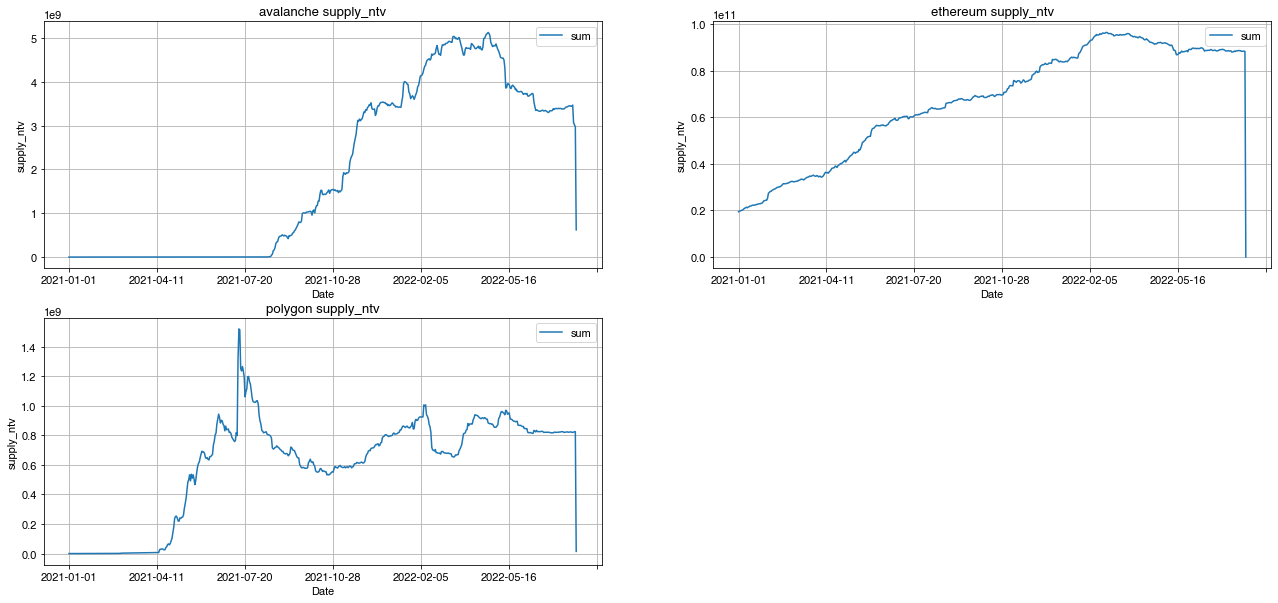

In [657]:
plot_agg('supply_ntv')

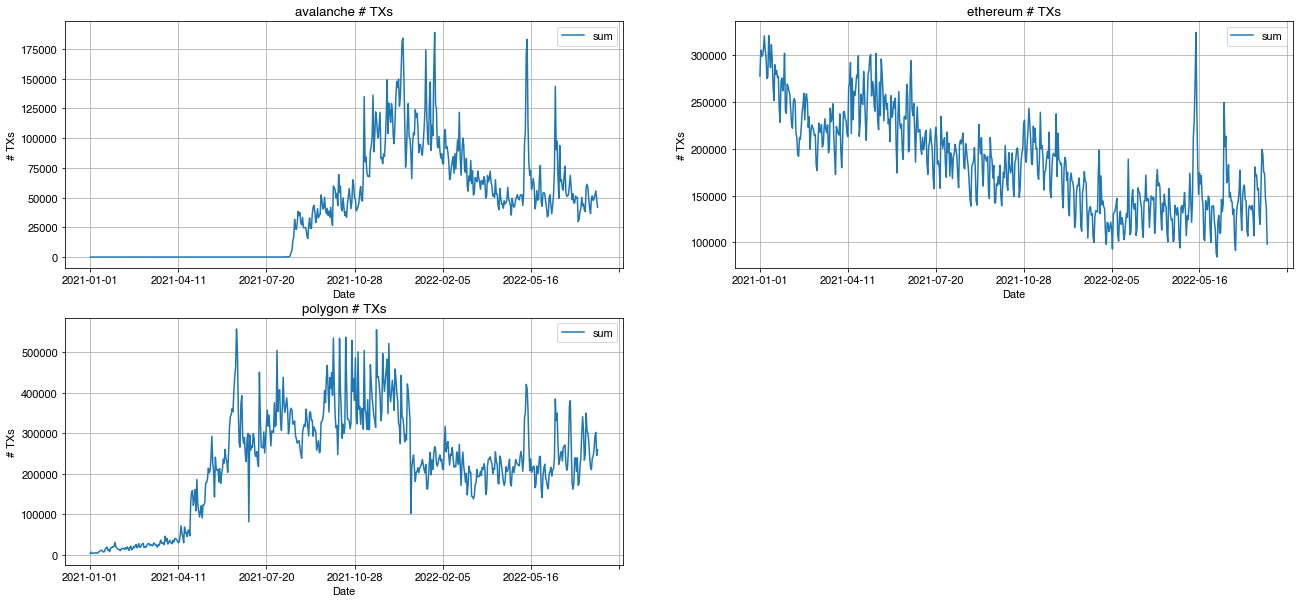

In [658]:
plot_agg('# TXs')

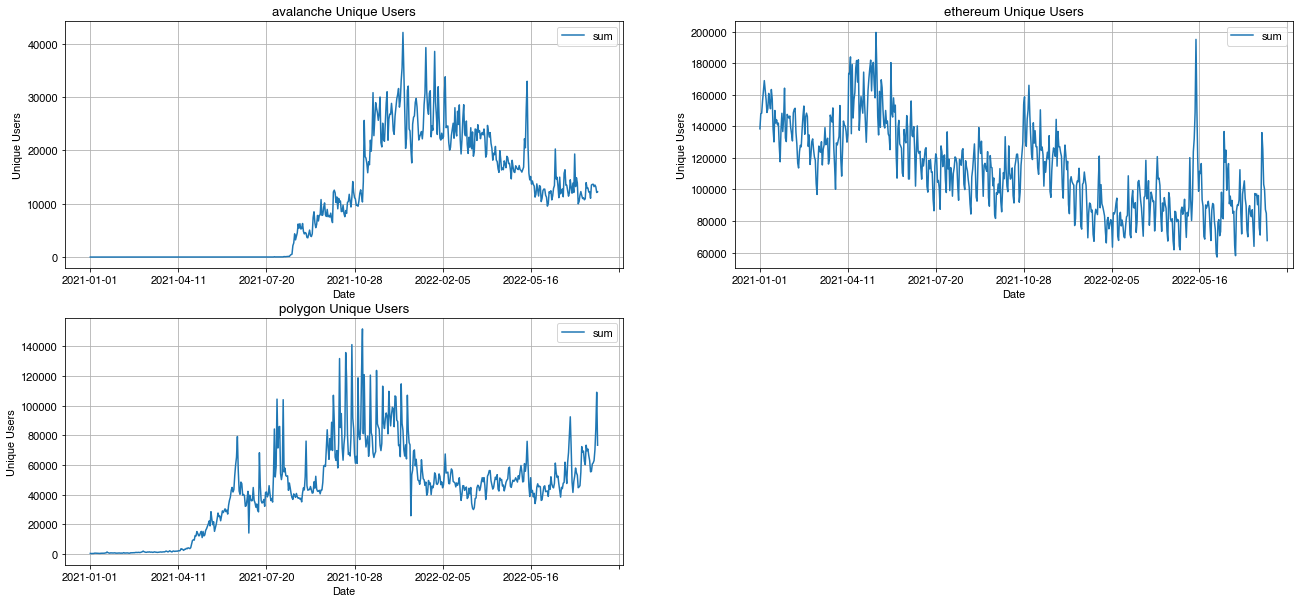

In [659]:
plot_agg('Unique Users')

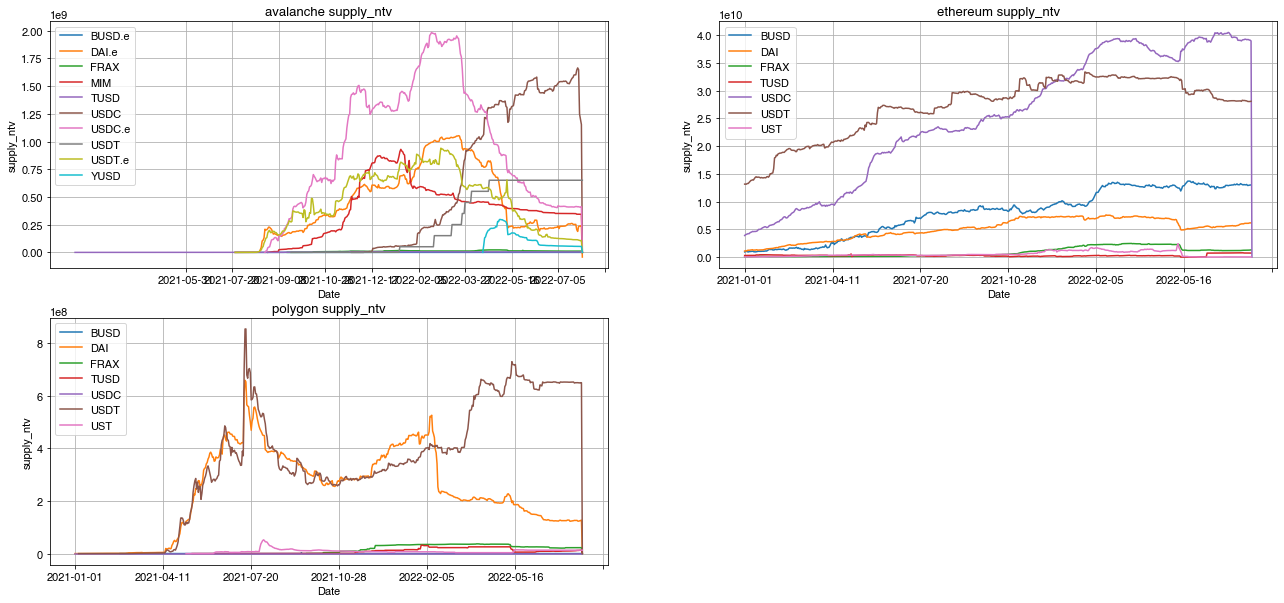

In [660]:
plot_by_token('supply_ntv')

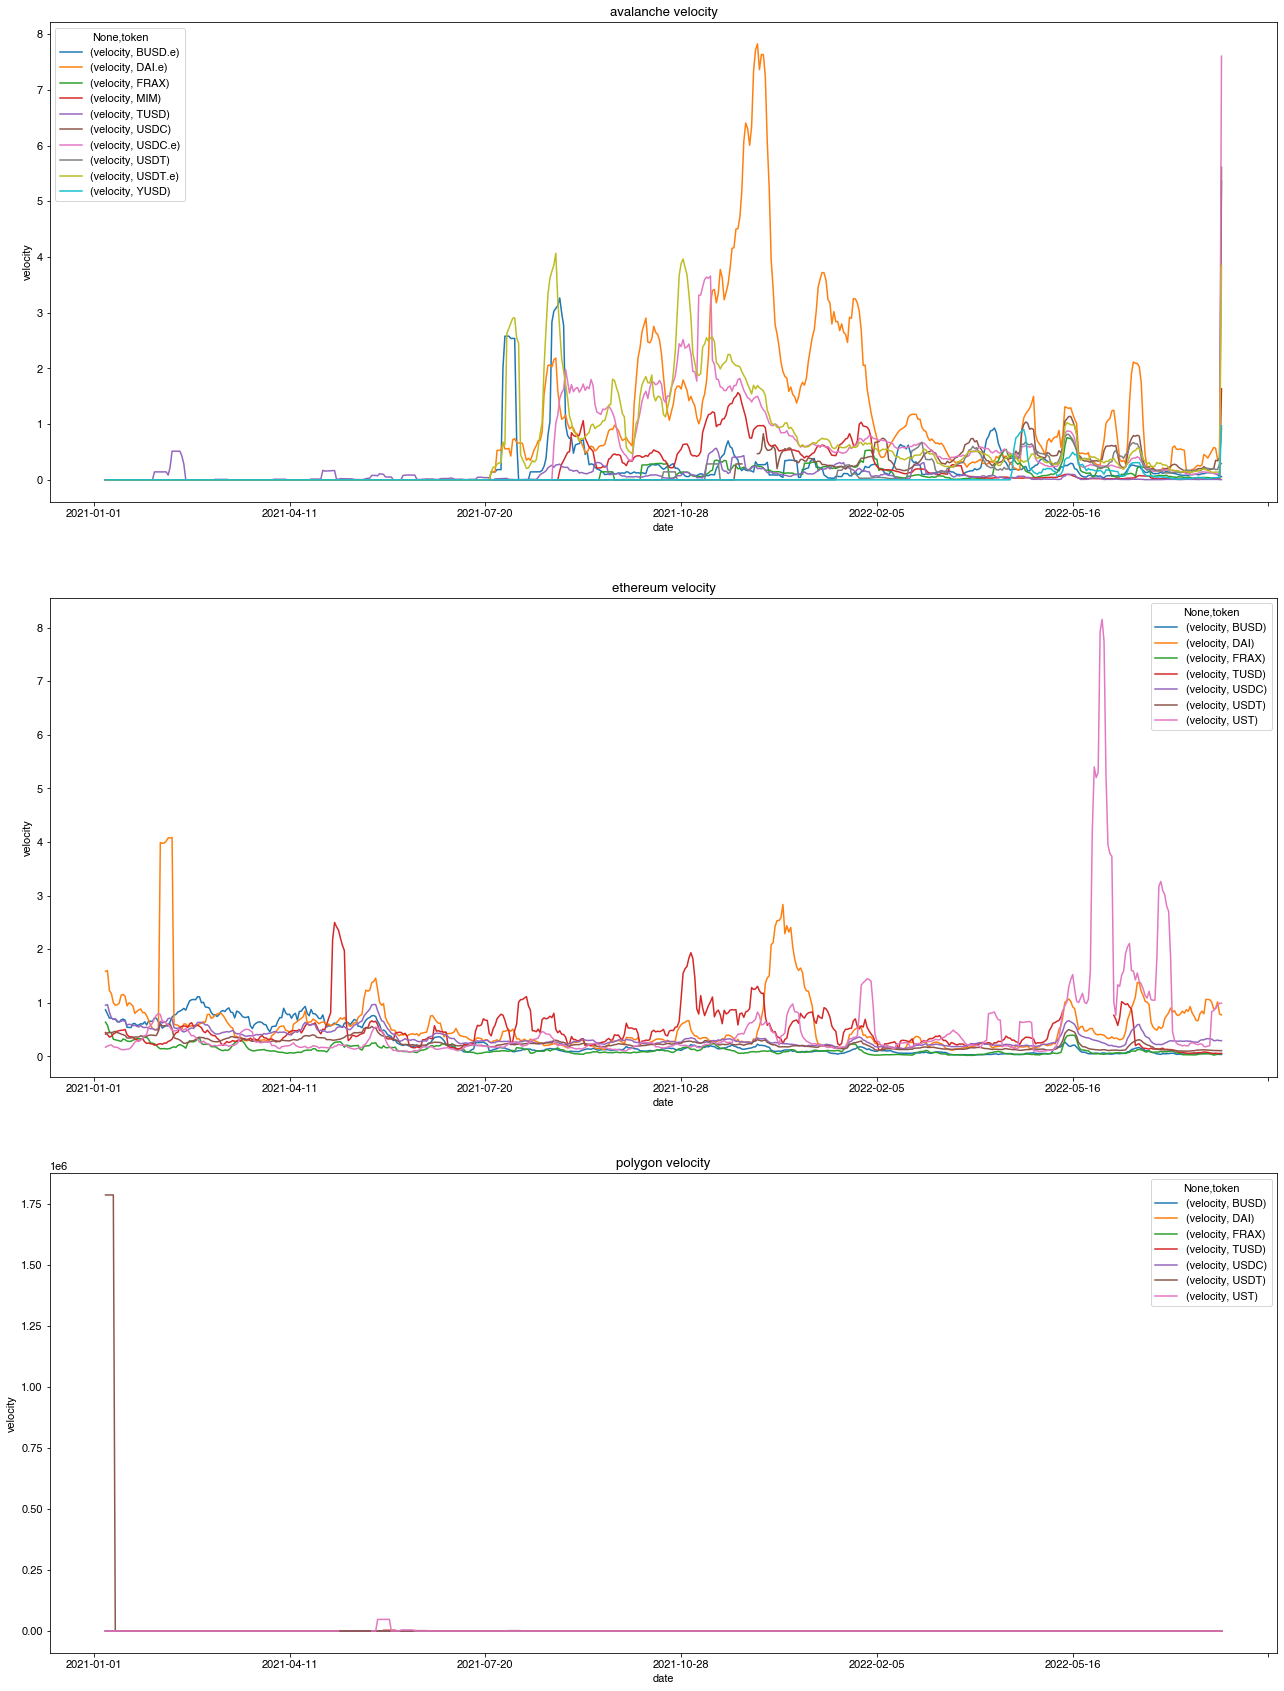

In [227]:
#Velocity
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
subplots_vel = [ax1,ax2,ax3]
chains = ['avalanche','ethereum','polygon']
#fig = plt.figure(figsize=(22,8))
for k in range(3):
    curr_chain = chains[k]
    velocity_df = stable_df[stable_df['chain']==curr_chain] 
    velocity_df = velocity_df.groupby(['date','token'])['velocity'].sum().to_frame().unstack(level=1).abs() 
    velocity_df.rolling(7).mean().plot(ax = subplots_vel[k],title=curr_chain+' velocity',ylabel='velocity')

In [228]:
lend_df['borrows/deposits']=lend_df['totalBorrowBalanceUSD']/lend_df['totalDepositBalanceUSD']

<AxesSubplot:xlabel='date'>

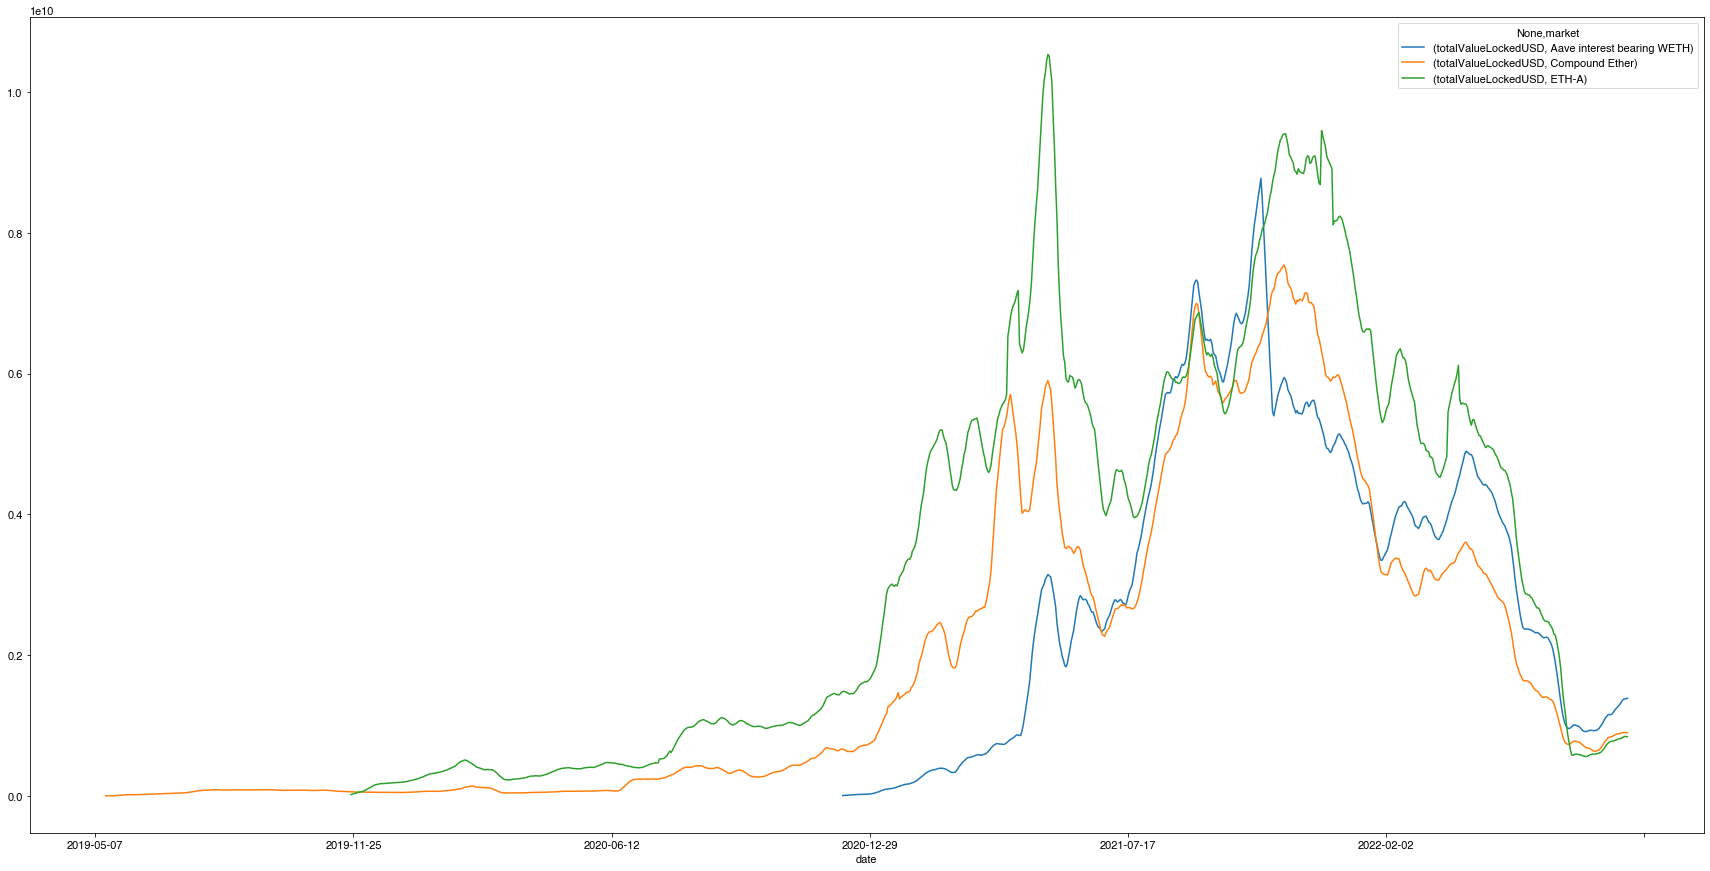

In [229]:
metric = 'totalValueLockedUSD'
curr_df = lend_df[(lend_df['chain']=='Ethereum') &
                 (lend_df[metric]>6e9)]
curr_df = curr_df.groupby(['date','market'])[metric].sum().to_frame().unstack(level=1).abs()
col_vals = curr_df.columns.values
top_markets = ['']*len(col_vals)
for k in range(len(col_vals)):
    top_markets[k] = col_vals[k][1]
curr_df = lend_df[lend_df['market'].isin(top_markets)]
curr_df = curr_df.groupby(['date','market'])[metric].sum().to_frame().unstack(level=1).abs()
curr_df.rolling(9).mean().plot(figsize=(30,15))

In [230]:
def plot_agg_lending(metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        curr_df = lend_df[(lend_df['chain']==curr_chain)]
        curr_df = curr_df.groupby(['date'])[metric].sum().to_frame().unstack(level=1).abs()
        curr_df.rolling(5).mean().plot(figsize=(30,30),ax=subplots[k],title = curr_chain+' '+metric)
        subplots[k].grid()

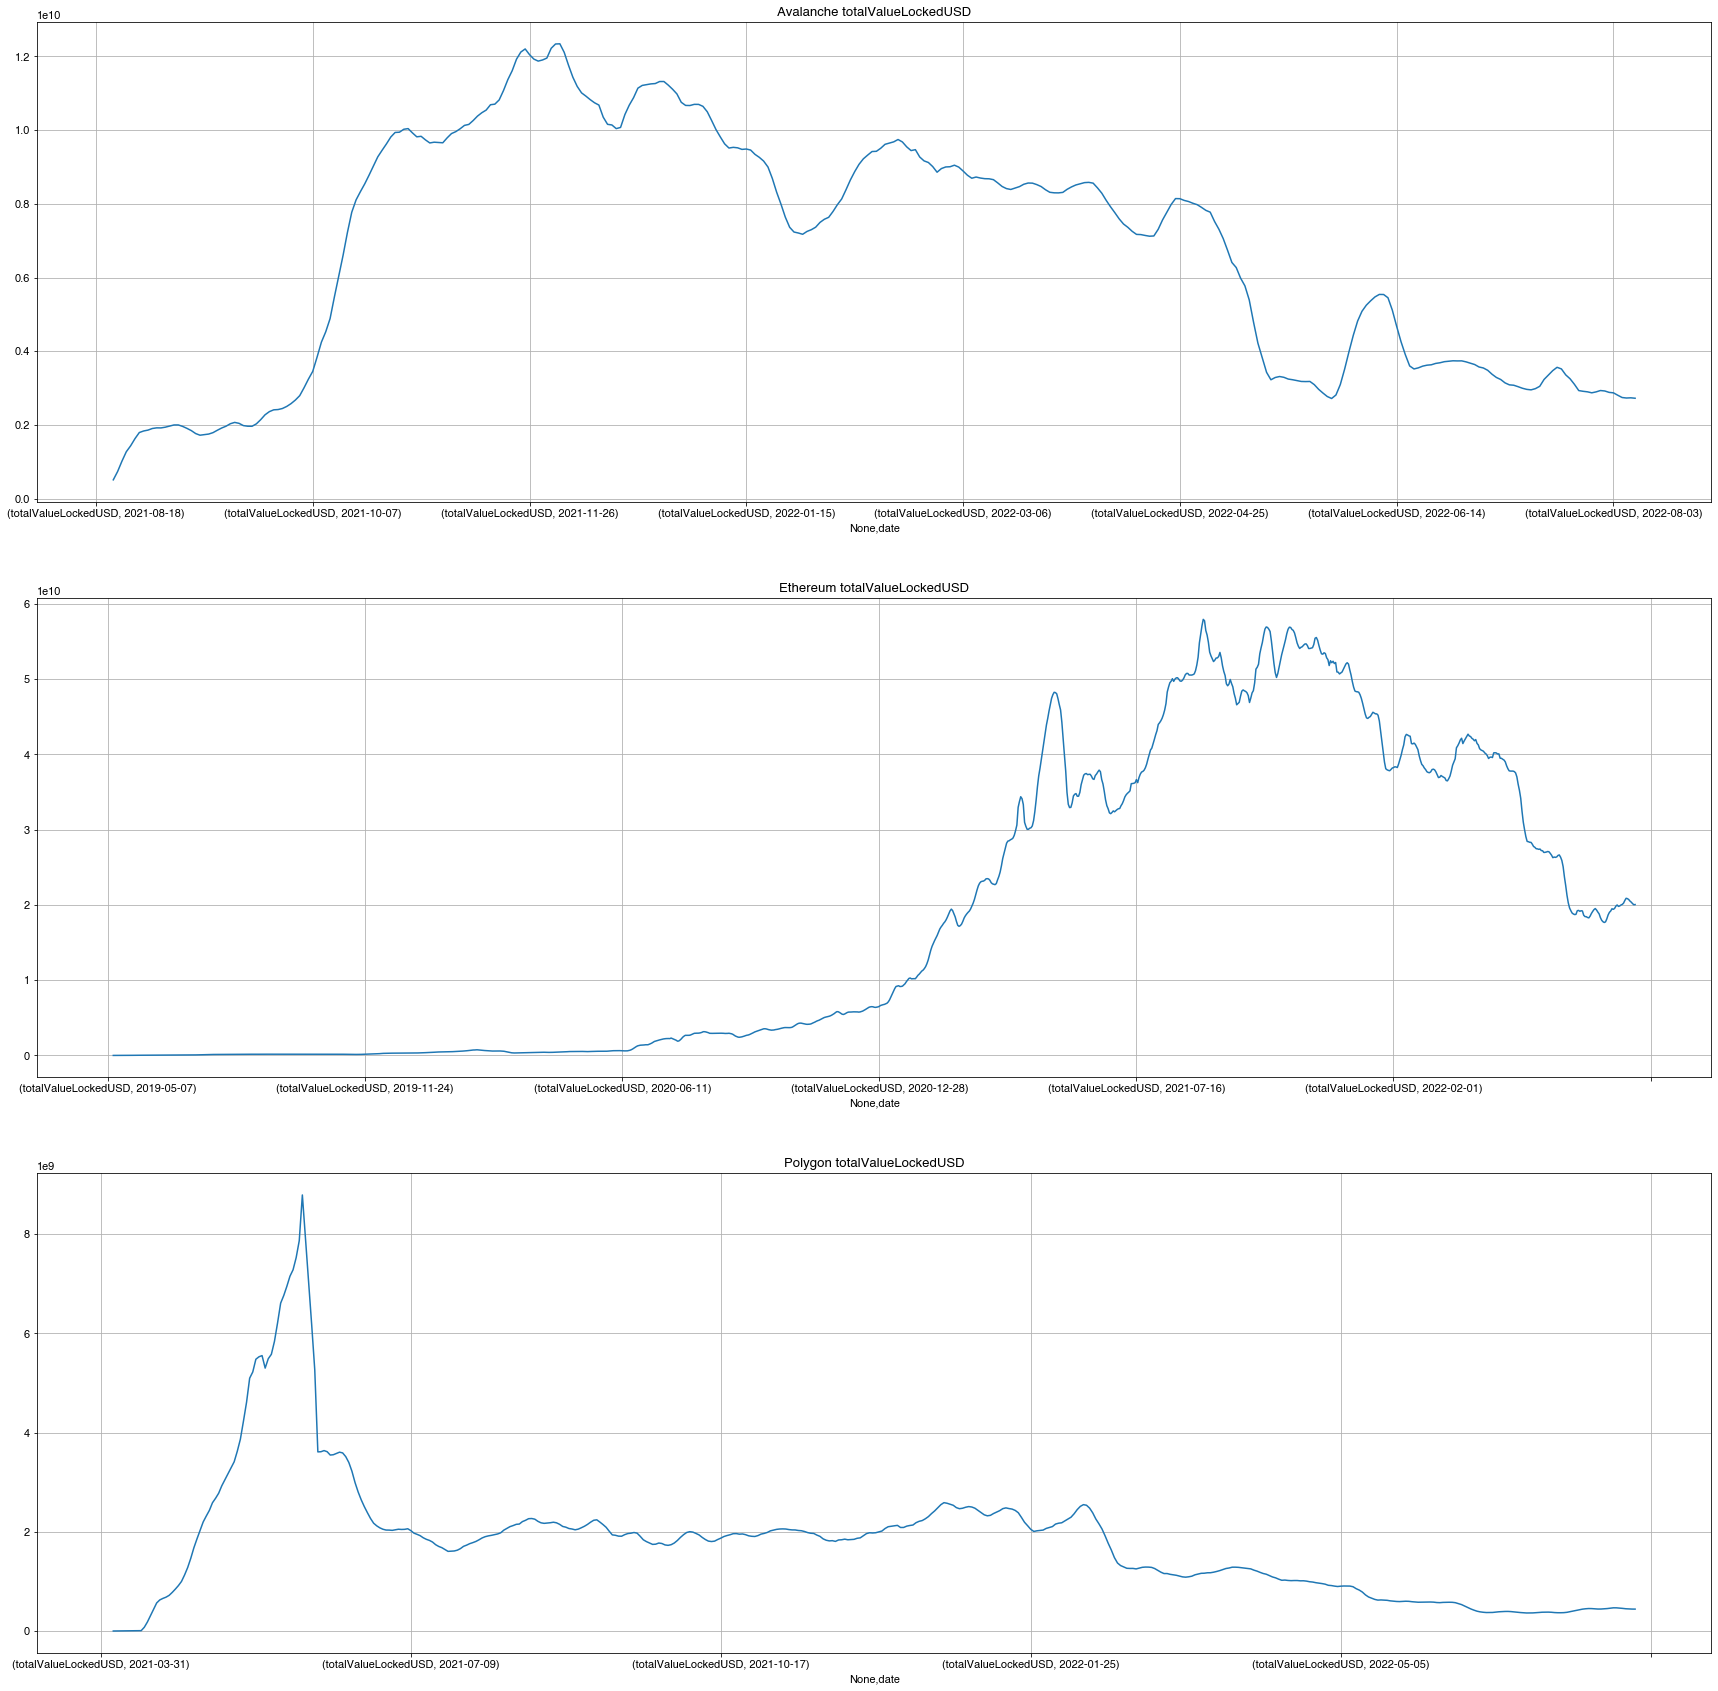

In [231]:
plot_agg_lending('totalValueLockedUSD')

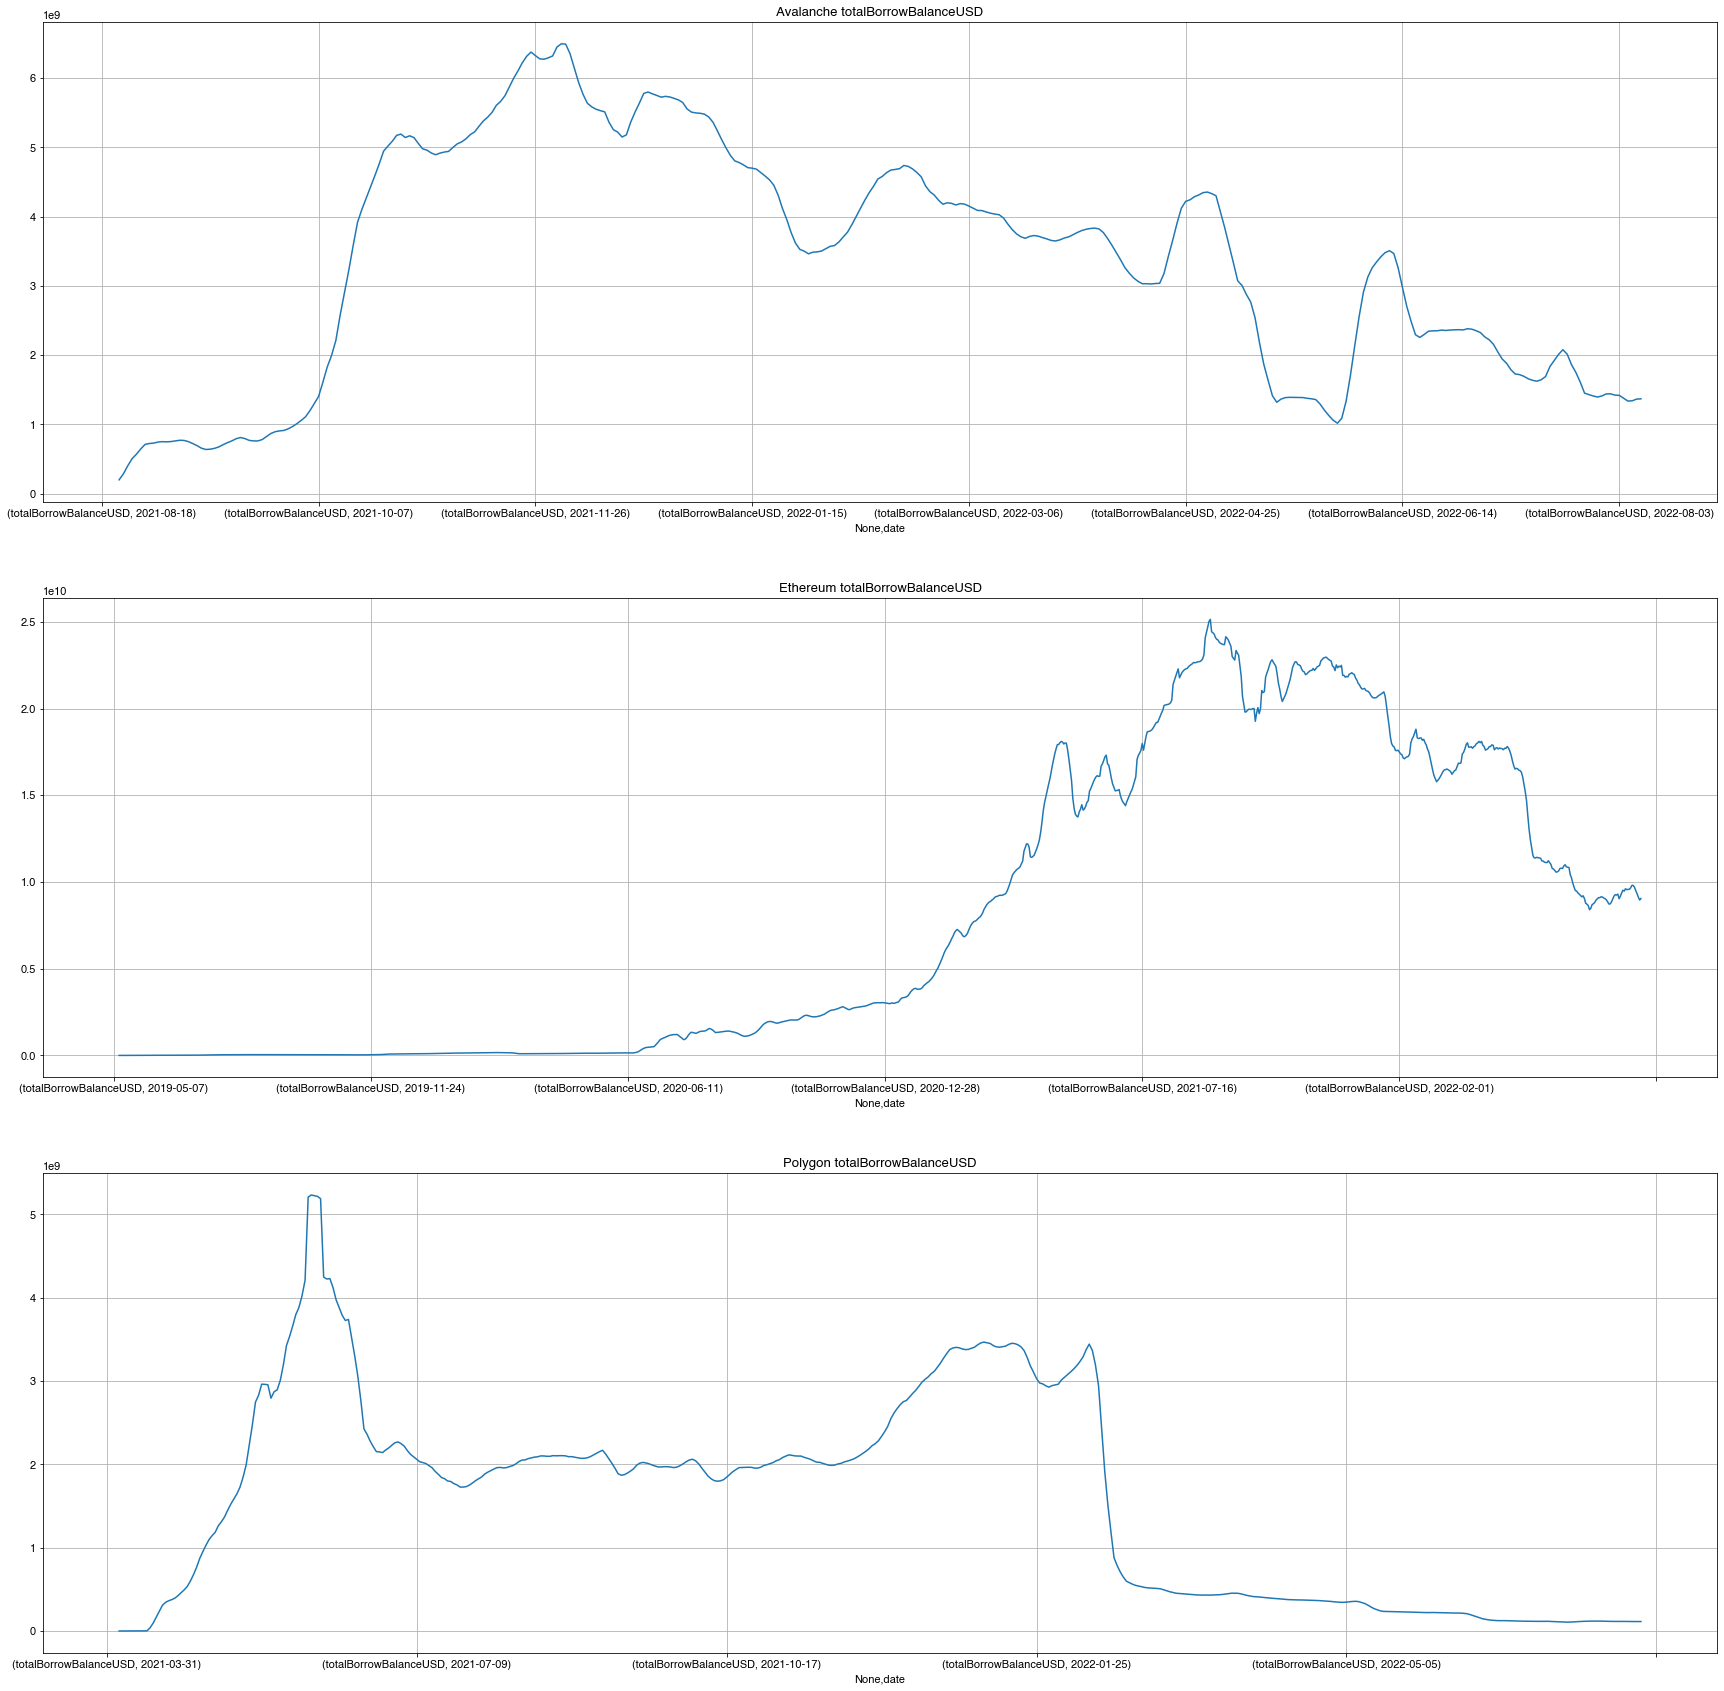

In [232]:
plot_agg_lending('totalBorrowBalanceUSD')

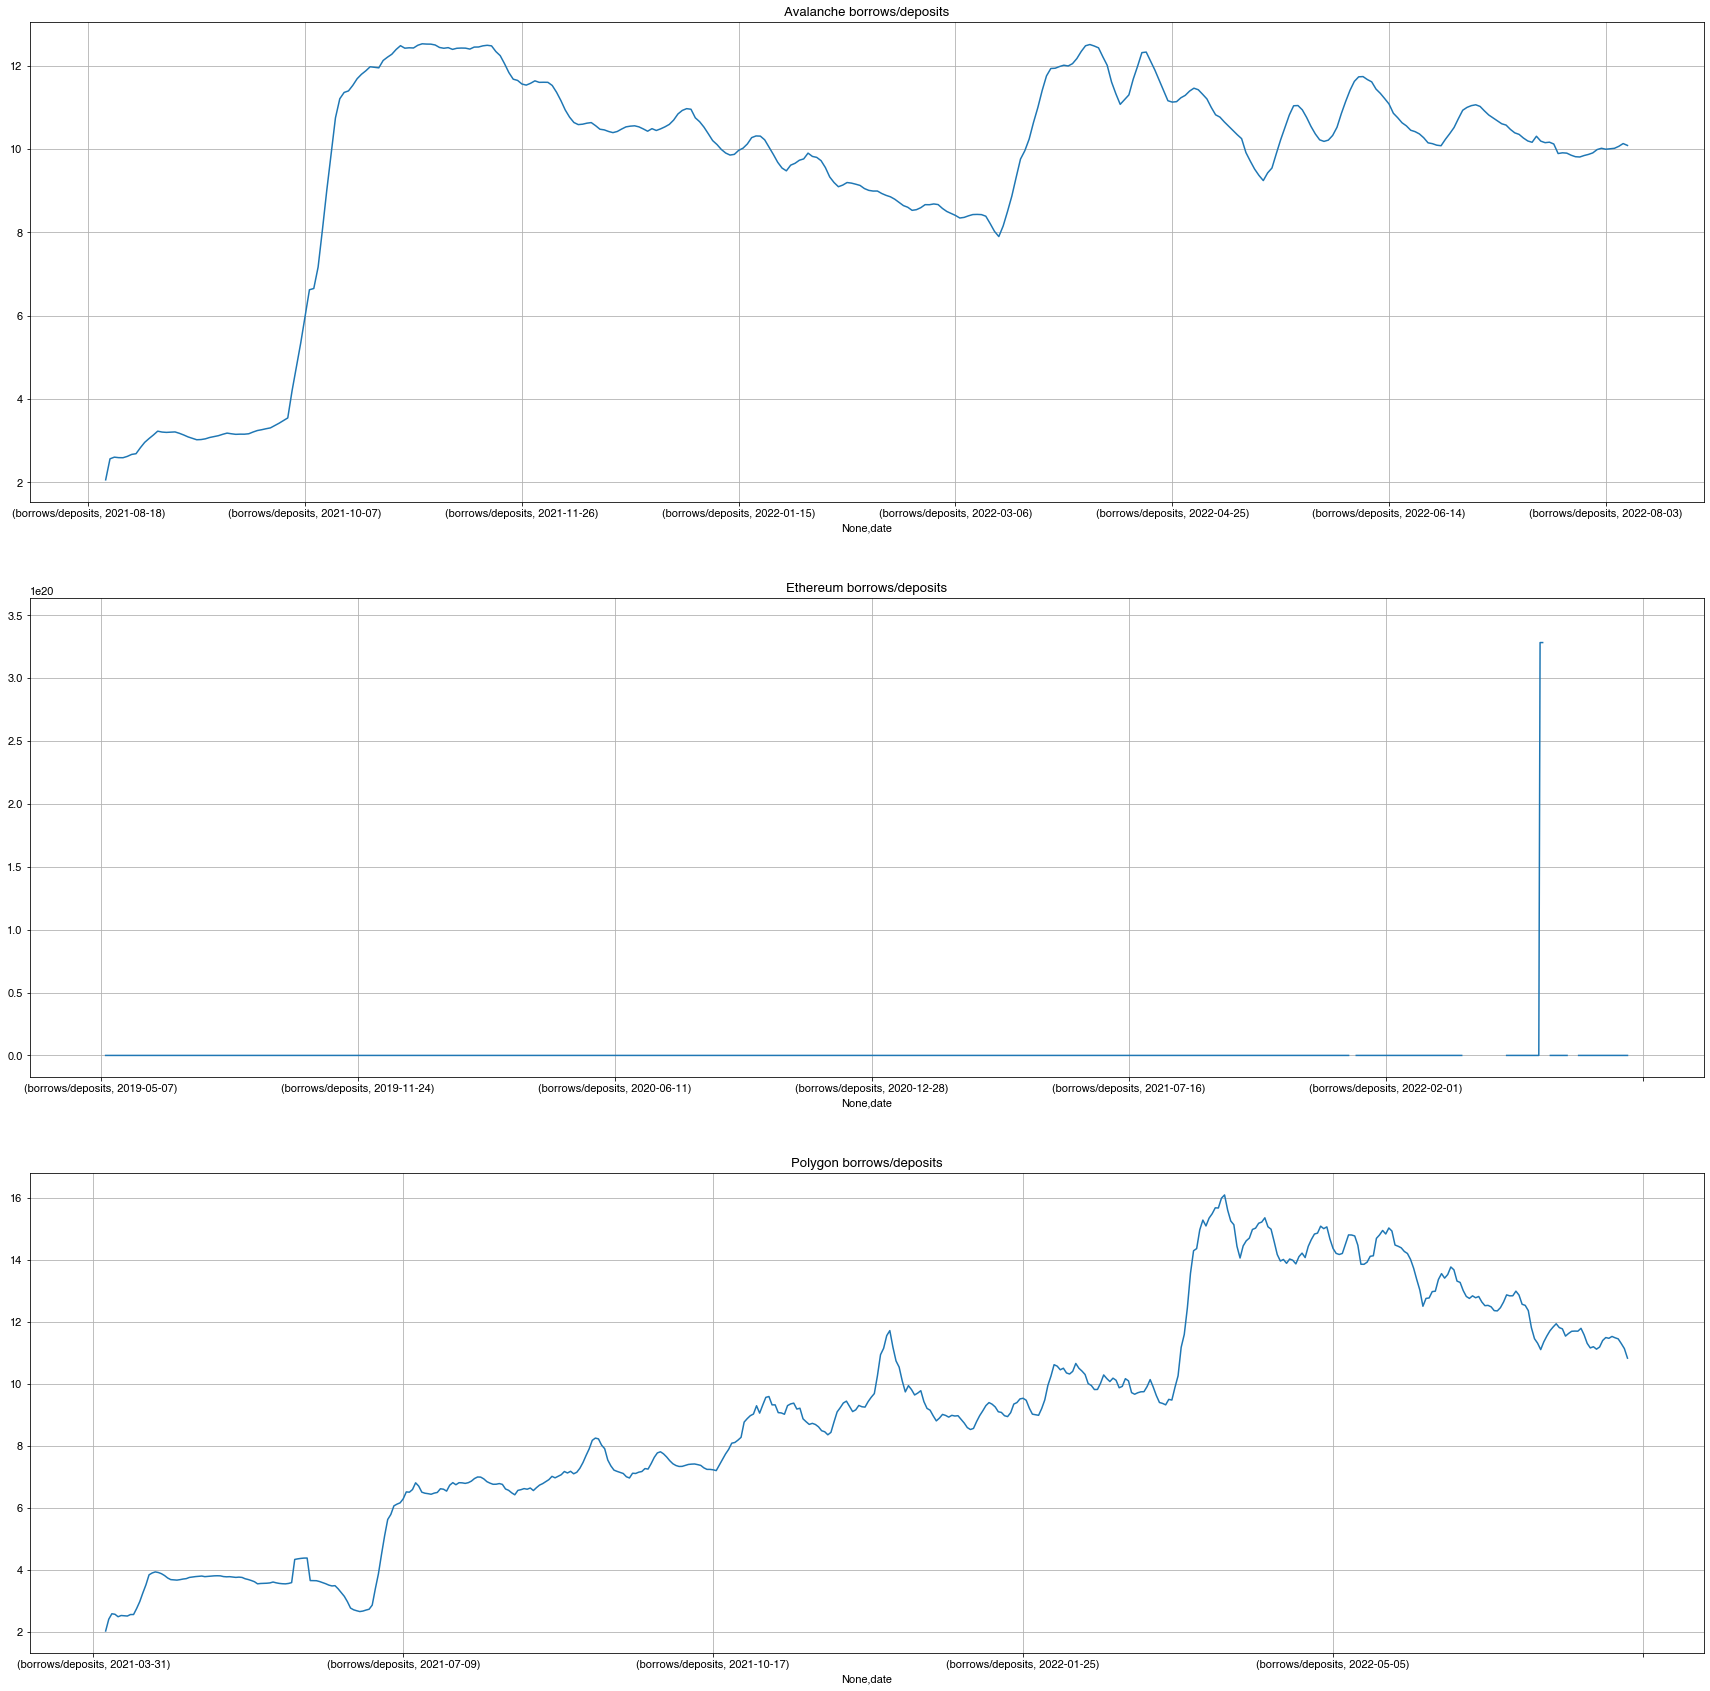

In [233]:
plot_agg_lending('borrows/deposits')

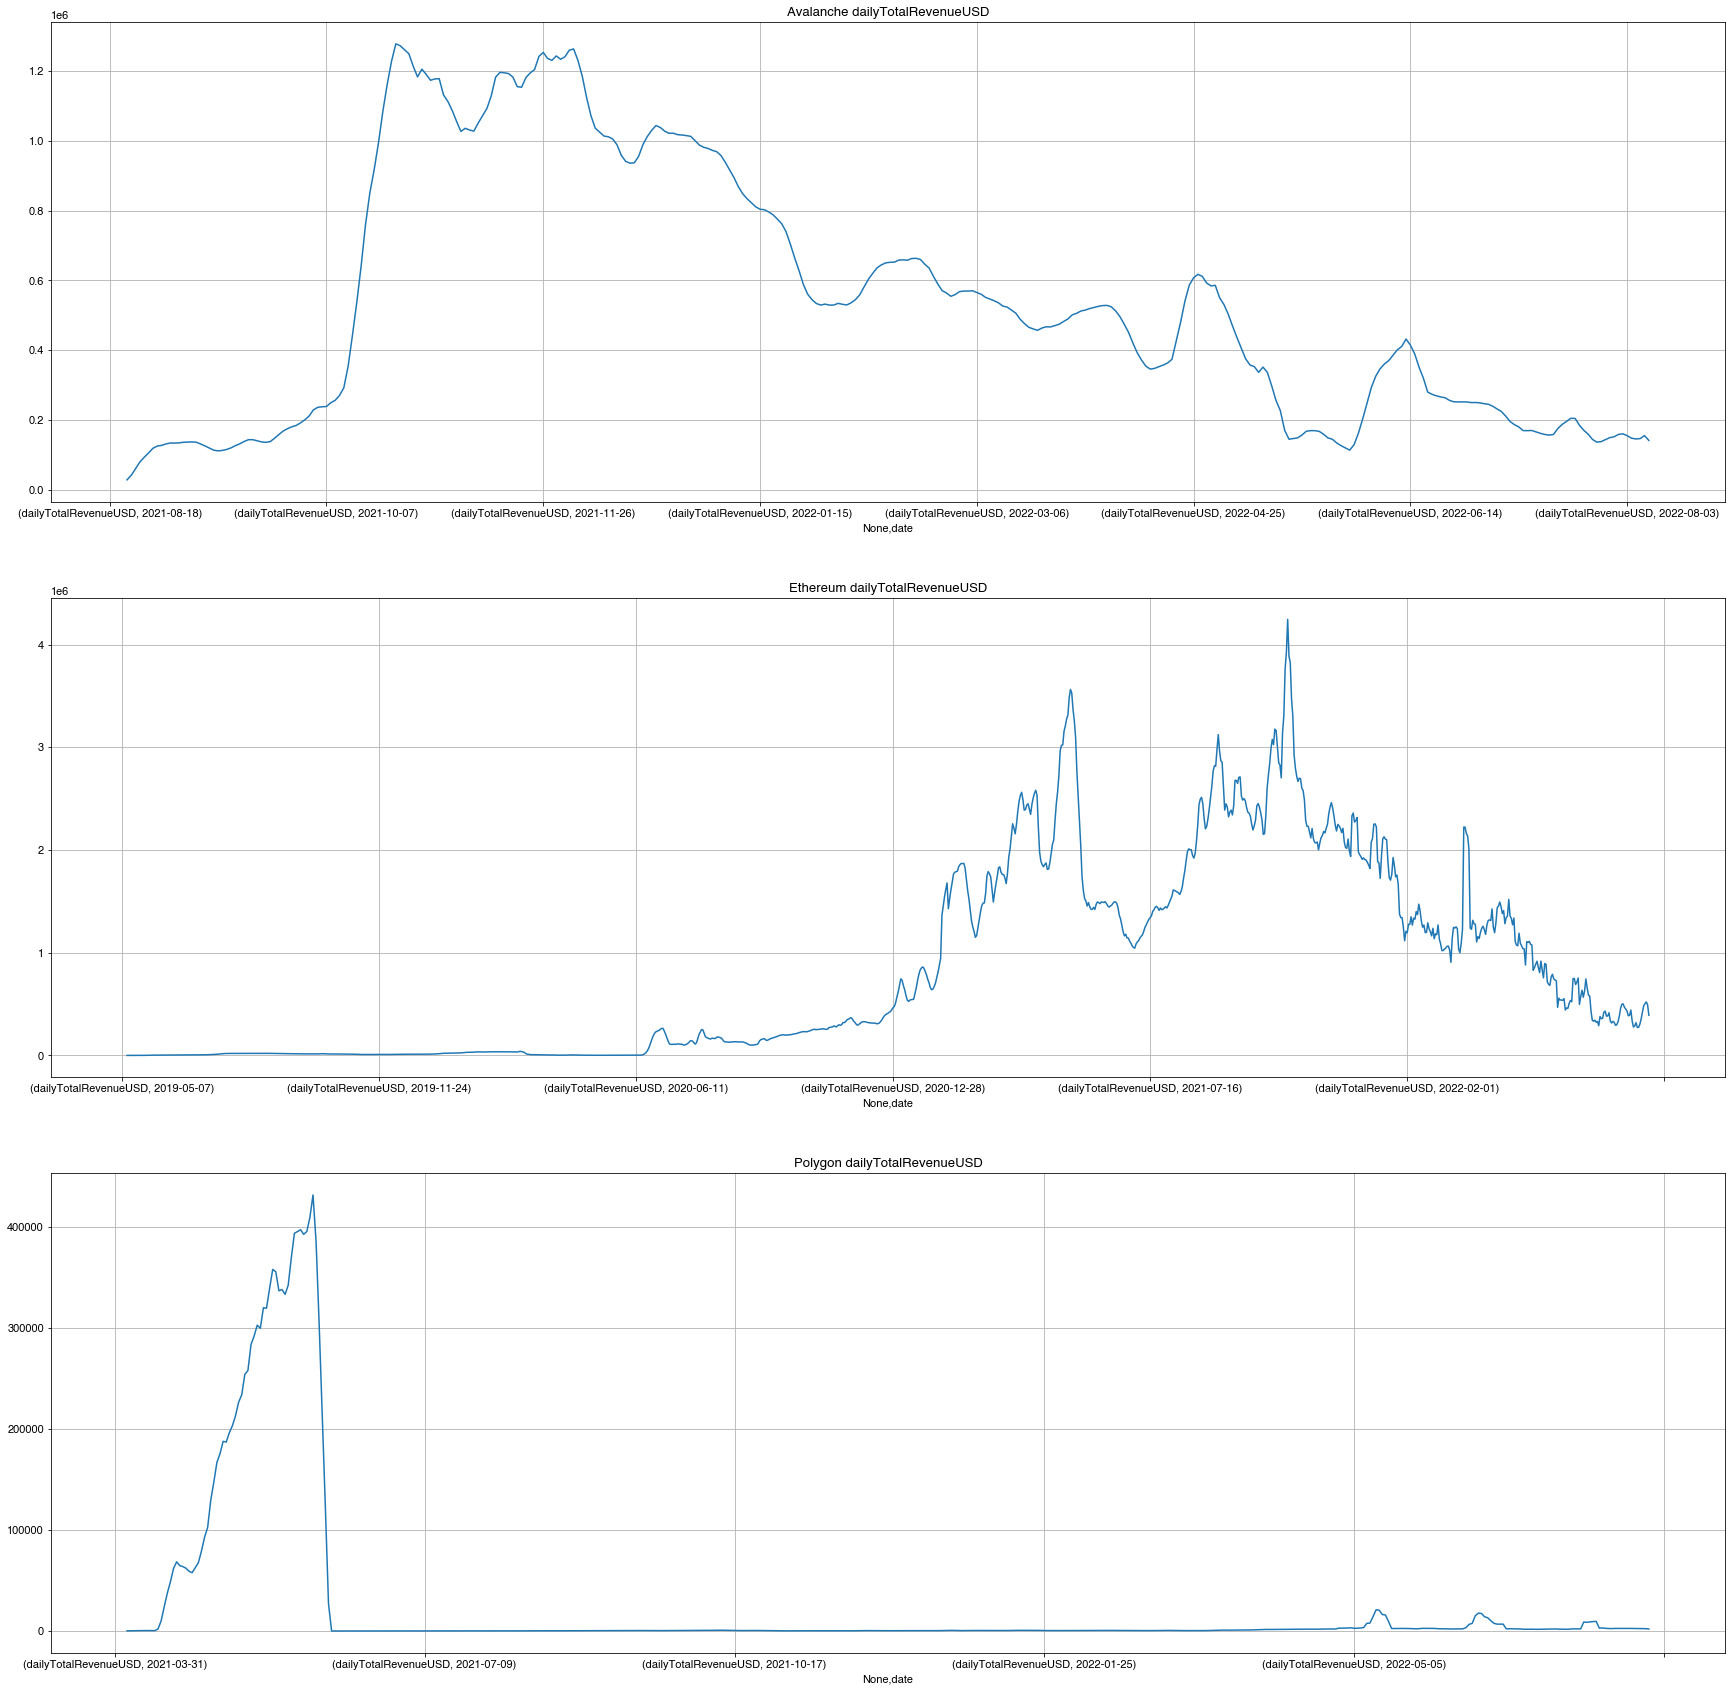

In [234]:
plot_agg_lending('dailyTotalRevenueUSD')

In [243]:
def plot_agg_dex(metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        curr_df = dex_df[(dex_df['chain']==curr_chain)]
        curr_df = curr_df.groupby(['date'])[metric].sum().to_frame().unstack(level=1).abs()
        curr_df.rolling(5).mean().plot(figsize=(30,30),ax=subplots[k],title = curr_chain+' '+metric)
        subplots[k].grid()

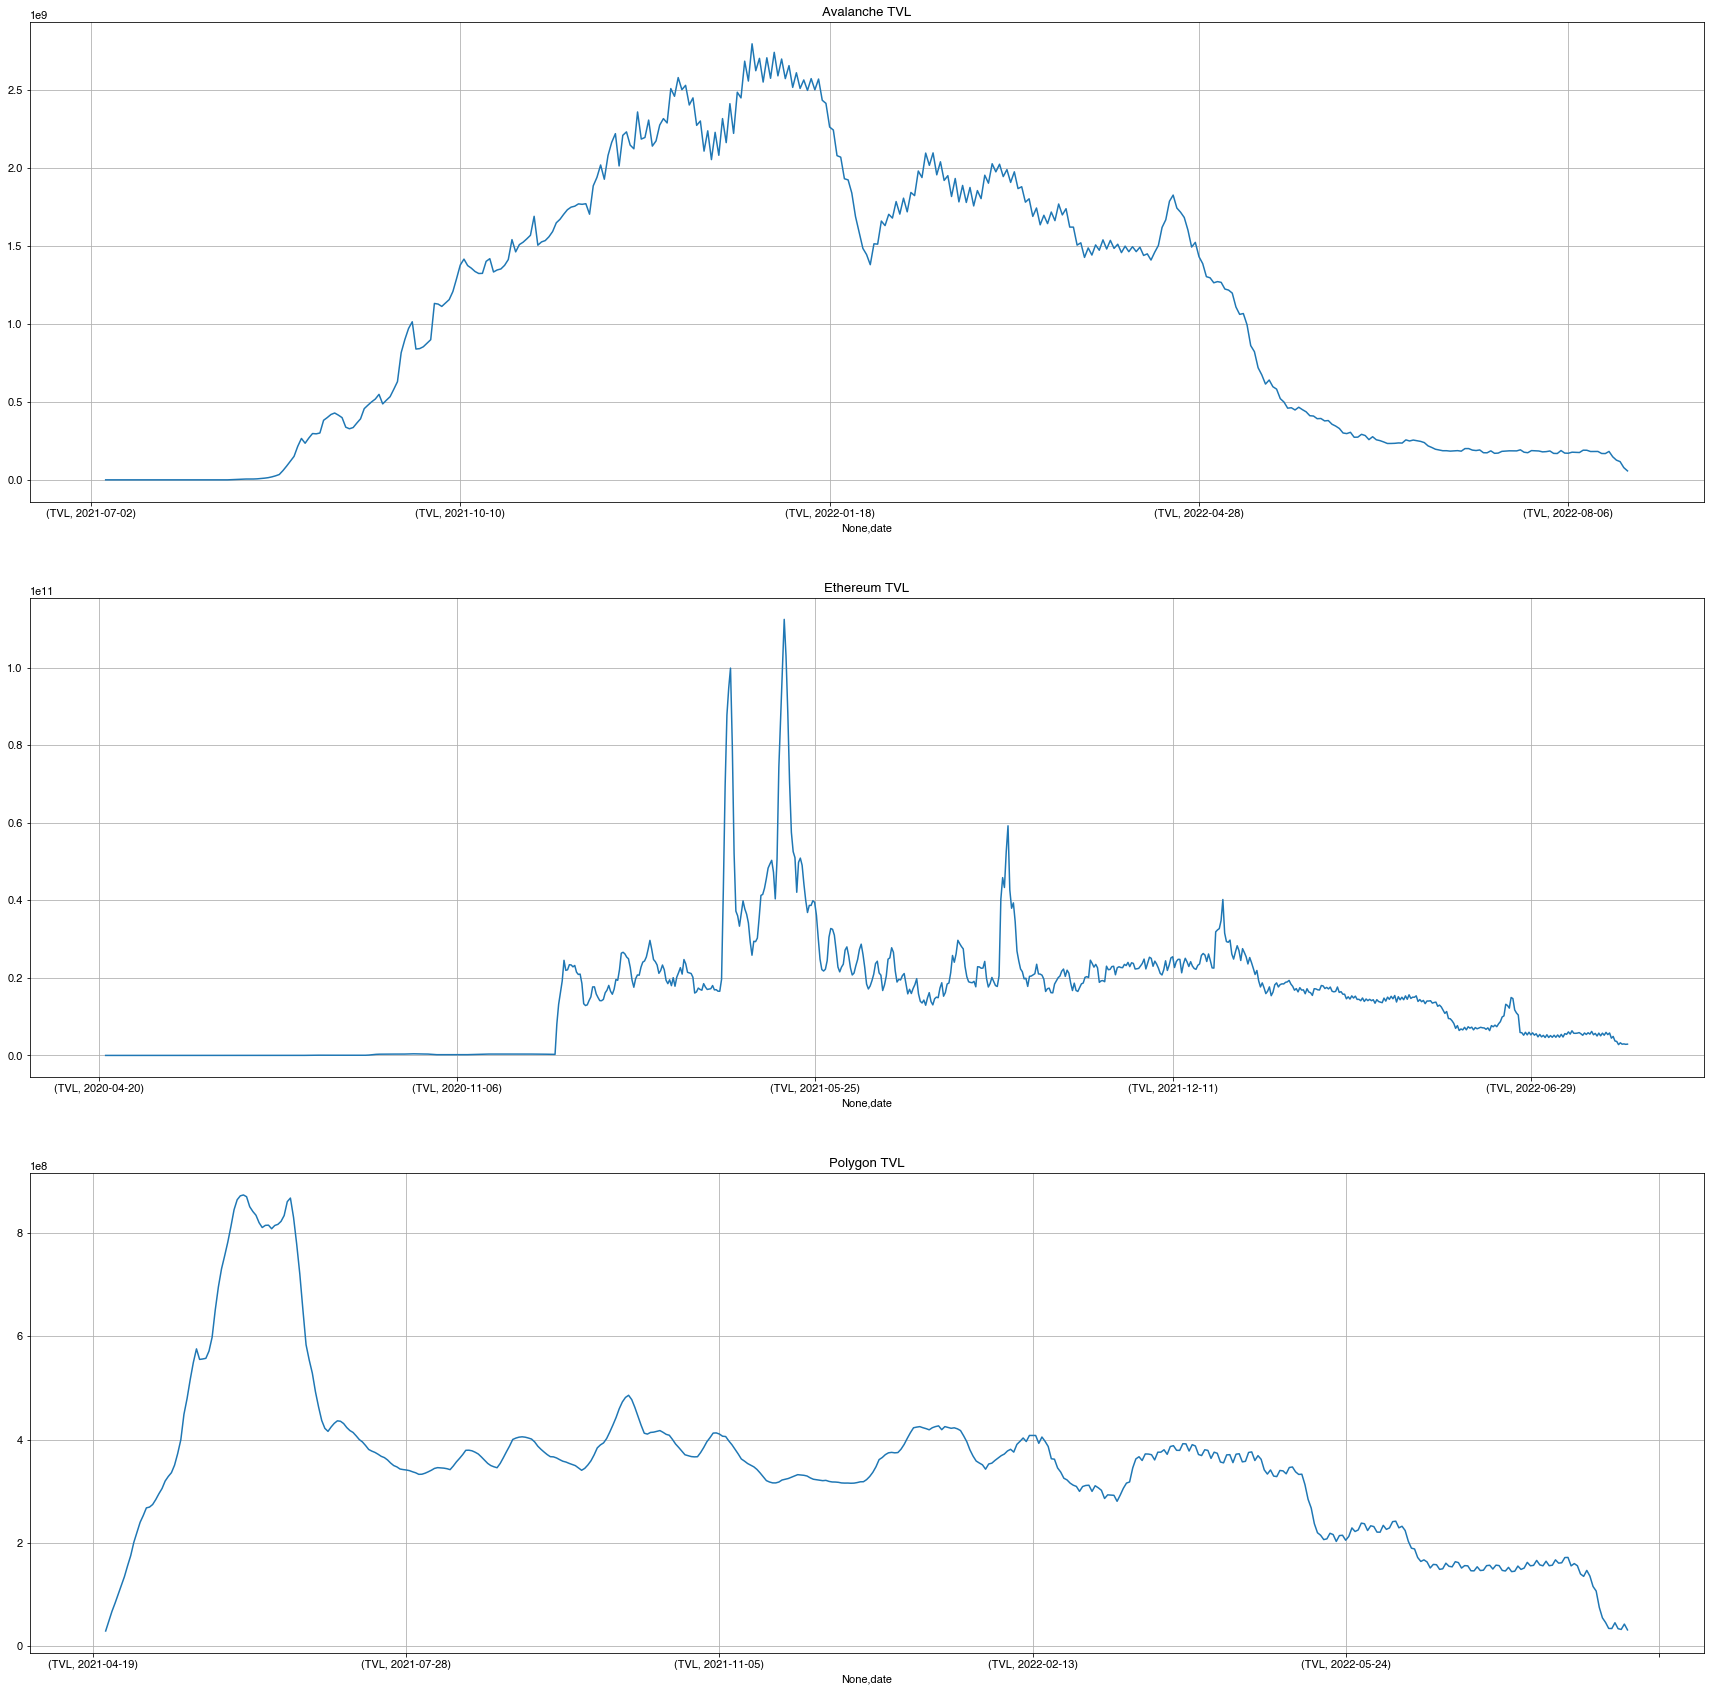

In [244]:
plot_agg_dex('TVL')

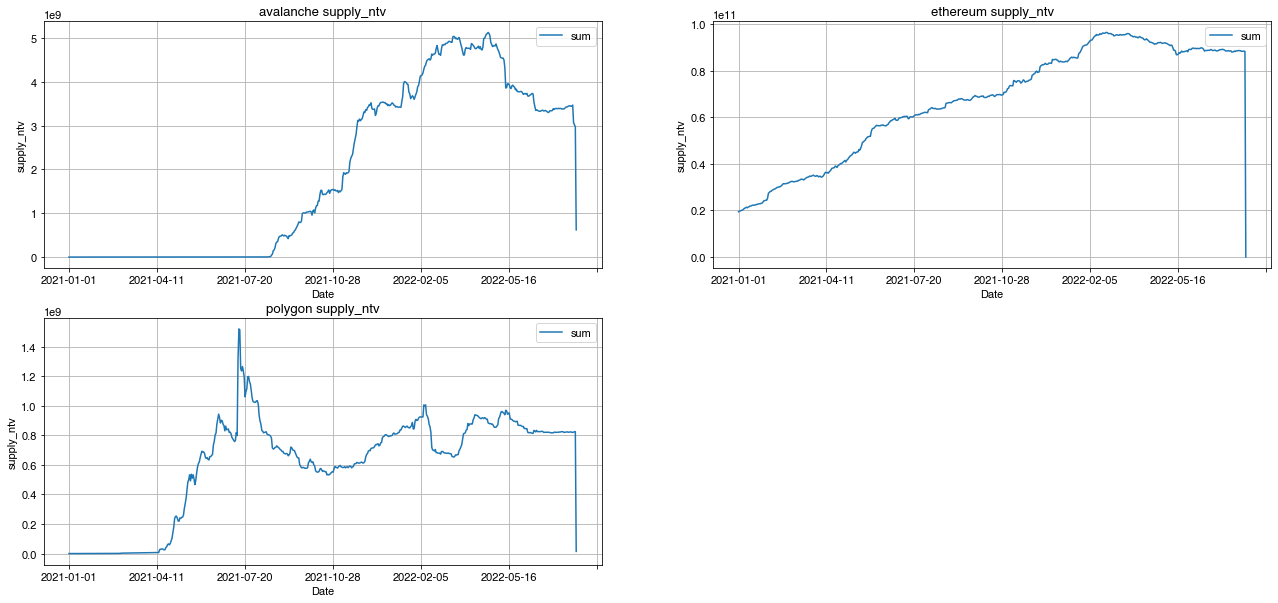

In [246]:
plot_agg_stable('supply_ntv')

In [255]:
def plot_agg_dex():
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    metric_1 = 'TVL'
    metric_2 = 'supply_ntv'
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        ax = subplots[k]
        curr_df = dex_df[(dex_df['chain']==curr_chain)]
        temp_df = stable_df[stable_df['chain']==curr_chain]
        curr_df = curr_df.groupby(['date'])[metric_1].sum().to_frame().unstack(level=1).abs()
        temp_df = temp_df.groupby(['date'])[metric_2].sum().to_frame().unstack(level=1).abs()
        curr_df.plot(figsize=(30,30),ax=ax,title = curr_chain+' '+metric_1)
        temp_df.plot(figsize=(30,30),ax=ax,title = curr_chain+' '+metric_2)
        subplots[k].grid()

In [1140]:
def plot_TVLbySupply(start_dt, end_dt):
    tvl_supply_array = []
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]

    chains = ['Avalanche','Ethereum','Polygon']
    chain_prices = [avax_df, eth_df, matic_df]
    dfs = []

    for k in range(3):
        price_df = concat_data(chain_prices[k], start_dt, end_dt)
        fix_dates(price_df)
        
        curr_chain=chains[k]
        ax = subplots[k]

        tvl_df = dex_df[(dex_df['chain']==curr_chain)]
        tvl_df = tvl_df[(tvl_df['date'] >= start_dt) & (tvl_df['date'] <= end_dt)]
        tvl_df = tvl_df.groupby(['date'])['TVL'].sum().to_frame().abs()
        dfs.append(tvl_df)

        supply_df = stable_df[(stable_df['chain']==curr_chain.lower())]
        supply_df = supply_df[(supply_df['date'] >= start_dt) & (supply_df['date'] <= end_dt)]
        supply_df = supply_df.groupby(['date'])['supply_ntv'].sum().to_frame().abs()
        dfs.append(supply_df)

        tvl_supply = tvl_df
        tvl_supply['supply'] = supply_df.supply_ntv
        tvl_supply['tvl/supply'] = tvl_df['TVL']/tvl_df['supply']
        tvl_supply = tvl_supply.reset_index()
        tvl_supply['price'] = price_df['price'] #Add token prices
        tvl_supply_array.append(tvl_supply)
        
        tvl_supply['date'] = pd.to_datetime(tvl_supply['date'])

        ROLLING_MEAN_LENGTH = 5
        
        ax_second_axis = ax.twinx()
        ax.plot(tvl_supply['date'],tvl_supply['tvl/supply'].rolling(9).mean())
        ax.axhline(tvl_supply['tvl/supply'].mean(), color='blue', linewidth=2)
        ax.set_title(curr_chain+ ' TVL/Supply | mean = '+str(round(tvl_supply['tvl/supply'].mean(),3)))
#        tvl_supply.plot(x = 'date', y = 'tvl/supply', figsize = (22,22), ax = ax, title = curr_chain+ ' TVL/Supply')
        ax.legend(['TVL/Supply'],loc = 'upper left')
        #tvl_supply['price'].rolling(ROLLING_MEAN_LENGTH).mean().plot(x = 'date',y = 'price',ax=ax_second_axis, color = 'red', ylabel = 'Price ($)')
        #ax_second_axis.legend(['Price'],loc = 'upper right')
        
        #df = tvl_supply
        #df['min'] = df.price.rolling(ROLLING_MEAN_LENGTH).mean()[(df.price.shift(1) > df.price) & (df.price.shift(-1) > df.price)]
        #df['max'] = df.price.rolling(ROLLING_MEAN_LENGTH).mean()[(df.price.shift(1) < df.price) & (df.price.shift(-1) < df.price)]
        
        #ax_second_axis.scatter(df.index, df['min'], c='r')
        #ax_second_axis.scatter(df.index, df['max'], c='g')
        
#        ax2.legend(loc='upper right')        
        subplots[k].grid()

    return tvl_supply_array

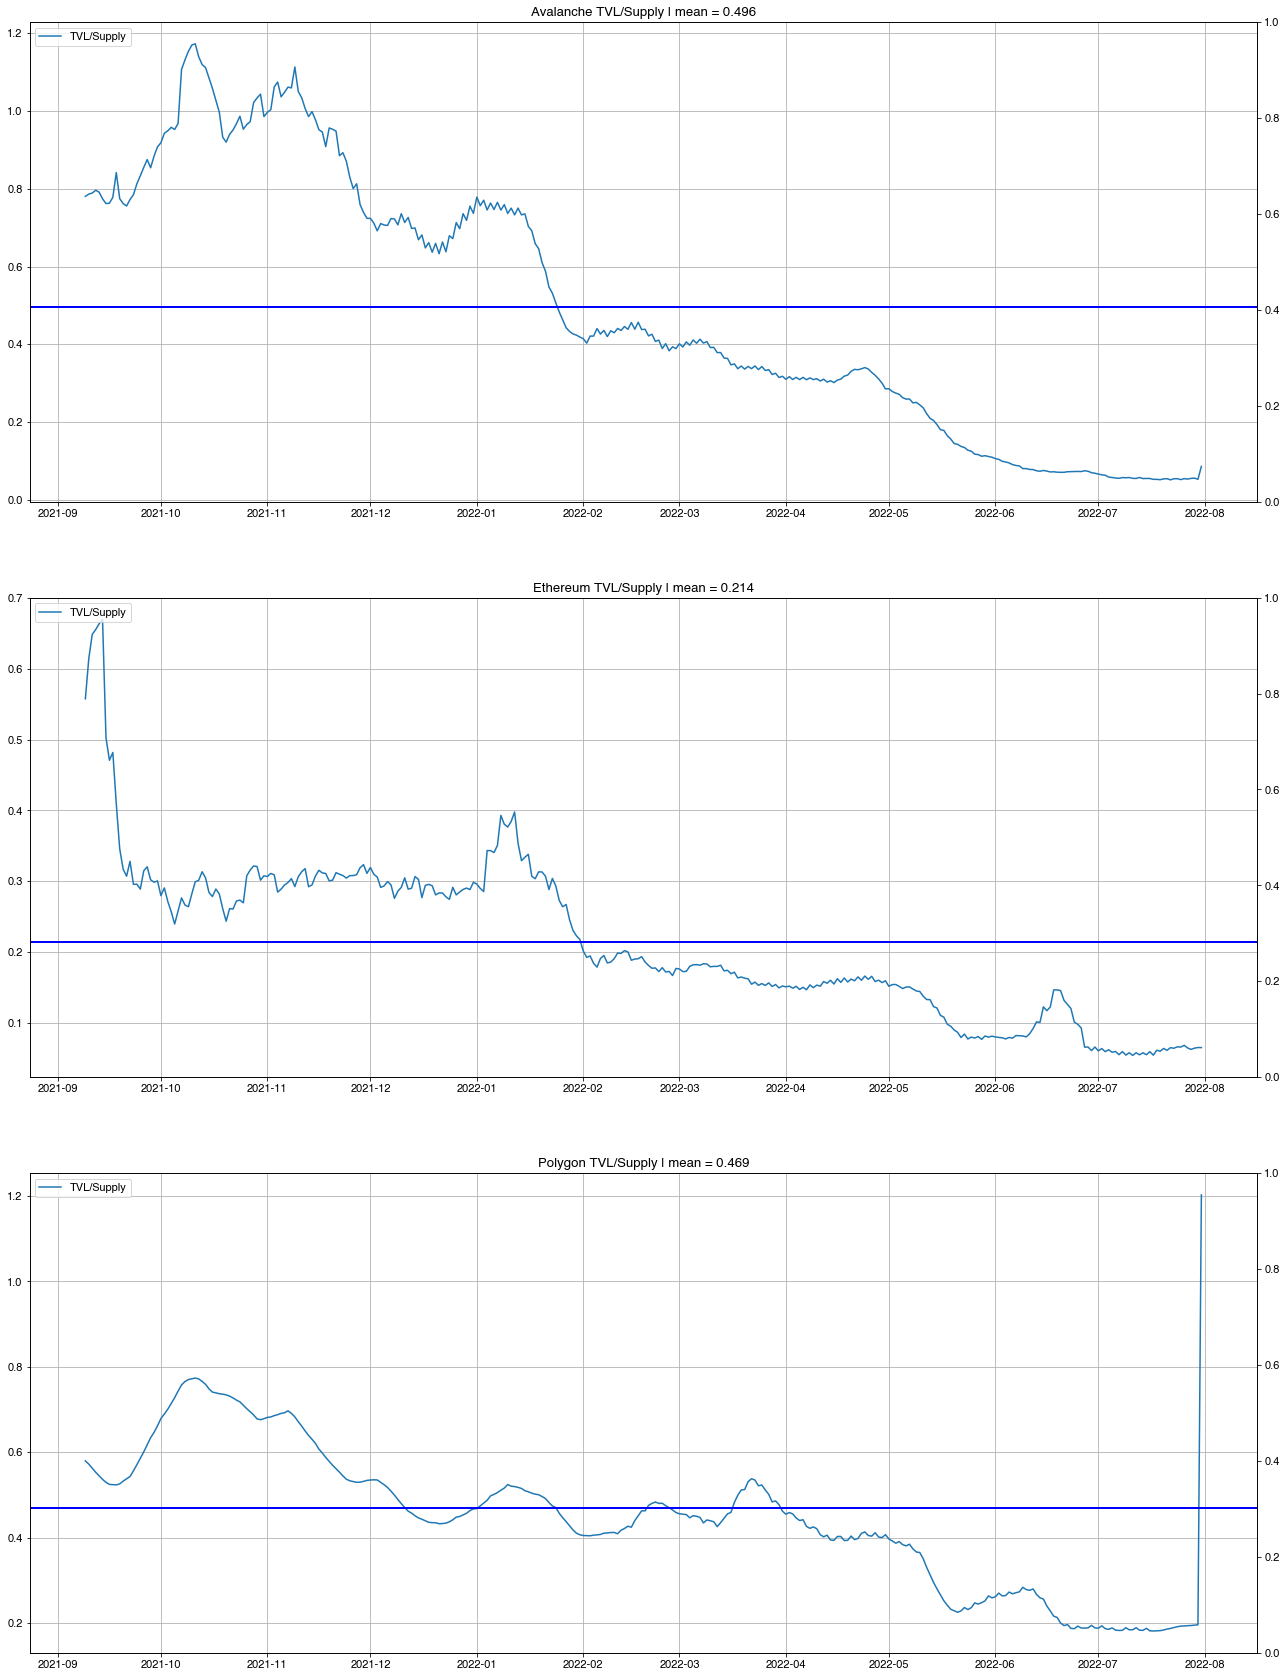

In [1141]:
tvl_supply_array = plot_TVLbySupply('2021-09-01', '2022-07-31')

In [700]:
def get_price(coin):
    dates = pd.date_range(start='2021-01-01', end='2022-07-31')
    price = [0.00]*len(dates)
    
    for k in range(len(dates)):
        data = cg.get_coin_history_by_id(id=coin,date=dates[k].strftime("%d-%m-%Y"), localization='false', vs_currency = 'usd')
        price[k] = data['market_data']['current_price']['usd']
        time.sleep(0.9)
    df = pd.DataFrame({'date':dates, 'price':price})
    return df

In [1086]:
tvl_supply_array[0]

,date,TVL,supply,tvl/supply,price
0,2021-07-02,0.000000e+00,5.947310e+05,0.000000,3.206777
1,2021-07-03,0.000000e+00,5.947310e+05,0.000000,3.665840
2,2021-07-04,0.000000e+00,5.947310e+05,0.000000,3.501131
3,2021-07-05,0.000000e+00,5.947310e+05,0.000000,3.460422
4,2021-07-06,0.000000e+00,5.925535e+05,0.000000,3.515633
...,...,...,...,...,...
389,2022-07-26,1.974878e+08,3.443513e+09,0.057351,63.031441
390,2022-07-27,1.820568e+08,3.470263e+09,0.052462,68.148857
391,2022-07-28,2.062503e+08,3.066535e+09,0.067258,66.139206
392,2022-07-29,2.045010e+08,3.022972e+09,0.067649,64.837427


In [941]:
test_pool = dex_df[(dex_df['protocol']=='Trader Joe')& (dex_df['pool_name']=='USDC.e/WAVAX') & (dex_df['chain']=='Avalanche') & (dex_df['protocol_version']=='V1')]

test_pool = test_pool.drop_duplicates(subset=['date', 'pool_name'], keep='first')
test_pool = concat_data(test_pool, '2021-05-04', '2022-07-30')

pool_price = concat_data(avax_df, '2021-05-04', '2022-07-31') #TODO: Fix this date error
fix_dates(pool_price)

test_pool['date'] = pd.to_datetime(test_pool['date'])
test_pool['date'] = test_pool.date.dt.date
test_pool['date'] = pd.to_datetime(test_pool['date'])

pool_price['date'] = pd.to_datetime(pool_price['date'])
pool_price['date'] = pool_price.date.dt.date
pool_price['date'] = pd.to_datetime(pool_price['date'])

pool_price = pool_price.set_index('date')
test_pool = test_pool.set_index('date')
combined


,index,price,market_cap,total_volume,index,protocol,chain,protocol_version,pool_name,token_1,...,token_2_balance,token_2_value_USD,token_3,token_3_balance,token_4,token_4_balance,daily_revenue,TVL,ideal,%1
date,,,,,,,,,,,,,,,,,,,,,
2021-05-04,224,36.020536,4.632809e+09,626327133.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-05,225,30.477426,3.946616e+09,417038602.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-06,226,35.357342,4.561814e+09,266094761.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-07,227,37.995767,4.887942e+09,469600110.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-08,228,38.248243,4.929608e+09,673472110.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26,672,21.071410,6.056209e+09,583630829.6,277699.0,Trader Joe,Avalanche,V1,USDC.e/WAVAX,USDC.e,...,208960.440566,4.403091e+06,NaN,NaN,NaN,NaN,NaN,8.640541e+06,NaN,0.499868
2022-07-27,673,20.640077,5.851341e+09,316979808.5,278075.0,Trader Joe,Avalanche,V1,USDC.e/WAVAX,USDC.e,...,196212.003138,4.049831e+06,NaN,NaN,NaN,NaN,NaN,9.192362e+06,NaN,0.499971
2022-07-28,674,23.437344,6.632448e+09,692294672.7,278486.0,Trader Joe,Avalanche,V1,USDC.e/WAVAX,USDC.e,...,183541.385473,4.301723e+06,NaN,NaN,NaN,NaN,NaN,8.883361e+06,NaN,0.499669


In [963]:
combined = pd.concat([pool_price, test_pool], axis=1)
combined['token_2_value_USD'] = combined['token_2_balance']*combined['price']
combined['token_1_value_USD'] = combined['token_1_balance']
combined['%1'] = combined['token_1_value_USD']/combined['TVL']
combined = combined.reset_index()

/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/1784260764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_pool['date'] = pd.to_datetime(curr_pool['date'])
/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/1784260764.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_token['date'] = date_array


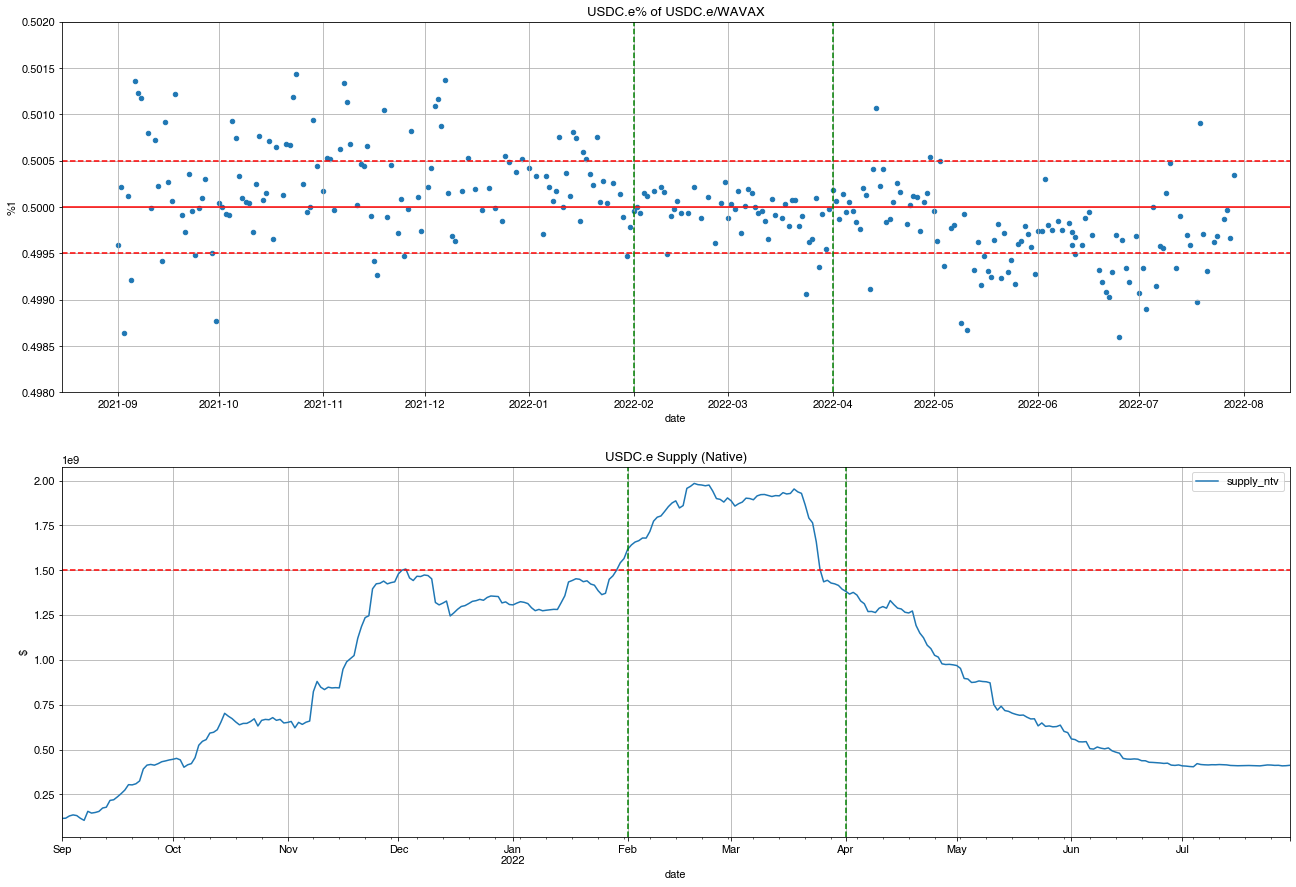

In [1075]:
dex_df['%1'] = dex_df['token_1_balance']/dex_df['TVL']
dex_df['%2'] = dex_df['token_2_balance']/dex_df['TVL']

curr_pool = dex_df[(dex_df['protocol']=='Trader Joe')& 
                   (dex_df['pool_name']=='USDC.e/WAVAX') & 
                   (dex_df['chain']=='Avalanche') & 
                   (dex_df['protocol_version']=='V1')]

start_dt = '2021-09-01'
end_dt = '2022-07-30'

curr_pool['date'] = pd.to_datetime(curr_pool['date'])
curr_pool = concat_data(curr_pool, start_dt, end_dt)
curr_pool['date'] = curr_pool.date.dt.date
#curr_pool = curr_pool.dropna()
#print(curr_pool)

token_1 = curr_pool['token_1'].iloc[100]
token_2 = curr_pool['token_2'].iloc[100]

curr_token = stable_df.loc[(stable_df['token']==token_1)]
date_array = pd.date_range('2021-01-01', '2022-07-31')
#date_array = date_array.map(lambda t: t.strftime('%Y-%m-%d'))
curr_token['date'] = date_array
#curr_token = curr_token.dropna()
curr_token = concat_data(curr_token, start_dt, end_dt)

fig, (ax1, ax2) = plt.subplots(2, figsize = (22,30))

curr_pool.plot.scatter(x = 'date', y= '%1', ax = ax1, ylim = [0.498,0.502], figsize = (22,15), title = (token_1 + "% of "+ token_1 + '/' + token_2))
ax1.axhline(y = 0.5, color = 'r', linestyle = '-')
ax1.axhline(y = 0.5005, color = 'r', linestyle = '--')
ax1.axhline(y = 0.4995, color = 'r', linestyle = '--')
ax1.axvline(x = datetime(2022,2,1), color = 'g', linestyle = '--')
ax1.axvline(x = datetime(2022,4,1), color = 'g', linestyle = '--')
ax1.grid()
#start_date = datetime(2021, 3, 2)
#end_date = datetime(2021, 3, 5)
#ax1.set_xlim([start_dt, end_dt])
curr_token.plot(x = 'date', y = 'supply_ntv', figsize = (22,15), ax = ax2, title = token_1 + ' Supply (Native)', ylabel = '$')
ax2.grid()
ax2.axvline(x = datetime(2022,4,1), color = 'g', linestyle = '--')
ax2.axvline(x = datetime(2022,2,1), color = 'g', linestyle = '--')
ax2.axhline(y = 1.5e9, color = 'r', linestyle = '--')

/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/2813789763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_pool['date'] = pd.to_datetime(curr_pool['date'])


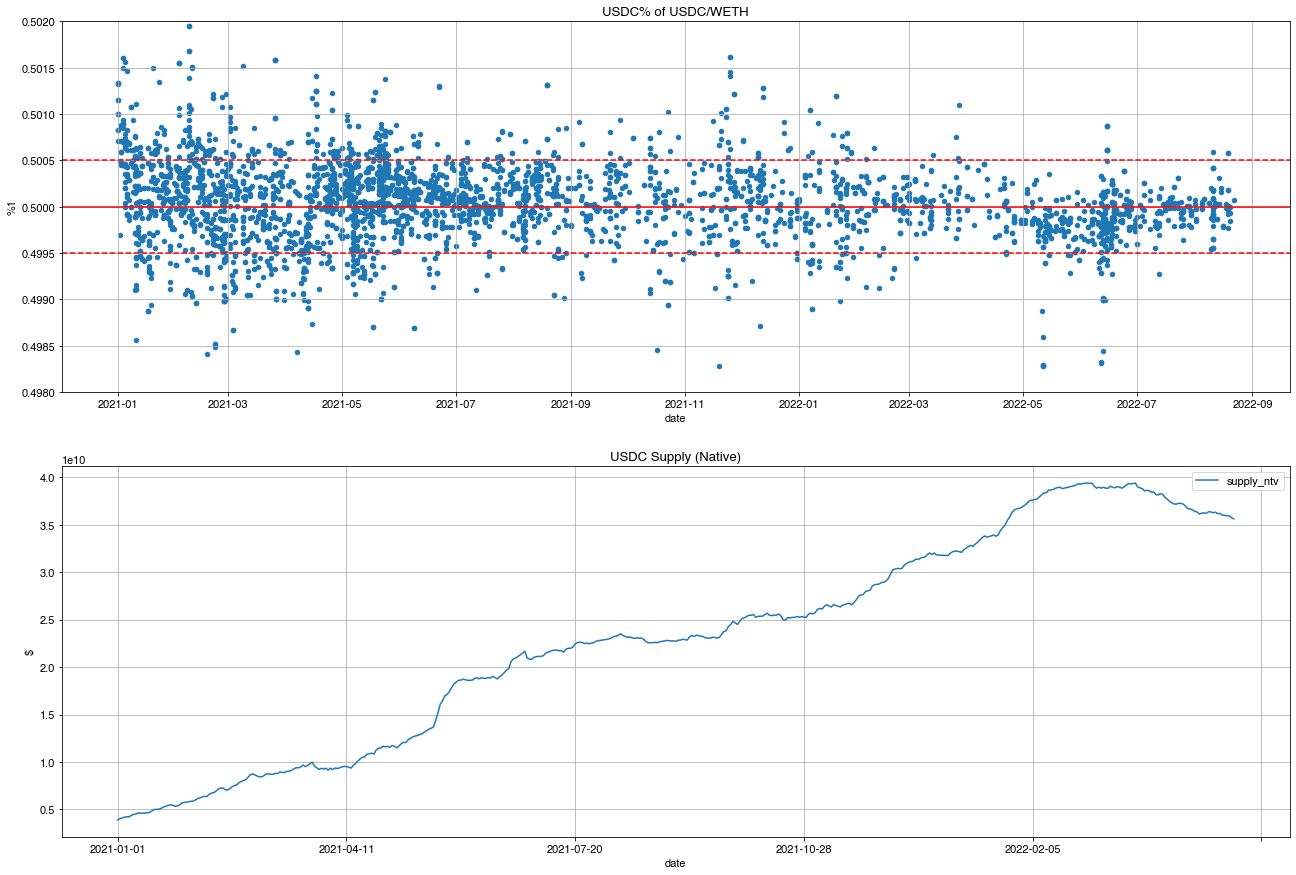

In [1084]:
curr_pool = dex_df[(dex_df['protocol']=='Uniswap')& 
                   (dex_df['pool_name']=='USDC/WETH') & 
                   (dex_df['chain']=='Ethereum') & 
                   (dex_df['protocol_version']=='V2')]

start_dt = '2021-01-01'
end_dt = '2022-05-04'

curr_pool['date'] = pd.to_datetime(curr_pool['date'])
#curr_pool = concat_data(curr_pool, start_dt, end_dt)
#curr_pool['date'] = curr_pool.date.dt.date
#curr_pool = curr_pool.dropna()
#print(curr_pool)

token_1 = curr_pool['token_1'].iloc[100]
token_2 = curr_pool['token_2'].iloc[100]
chain = curr_pool['chain'].iloc[100]

curr_token = stable_df.loc[(stable_df['token']==token_1)
                          & (stable_df['chain']==chain.lower())]
#date_array = pd.date_range('2021-01-01', '2022-07-31')
#date_array = date_array.map(lambda t: t.strftime('%Y-%m-%d'))
#curr_token['date'] = date_array
#curr_token = curr_token.dropna()
curr_token = concat_data(curr_token, start_dt, end_dt)

fig, (ax1, ax2) = plt.subplots(2, figsize = (22,30))

curr_pool.plot.scatter(x = 'date', y= '%1', ax = ax1, ylim = [0.498,0.502], figsize = (22,15), title = (token_1 + "% of "+ token_1 + '/' + token_2))
ax1.axhline(y = 0.5, color = 'r', linestyle = '-')
ax1.axhline(y = 0.5005, color = 'r', linestyle = '--')
ax1.axhline(y = 0.4995, color = 'r', linestyle = '--')
#ax1.axvline(x = datetime(2022,2,1), color = 'g', linestyle = '--')
#ax1.axvline(x = datetime(2022,4,1), color = 'g', linestyle = '--')
ax1.grid()
#start_date = datetime(2021, 3, 2)
#end_date = datetime(2021, 3, 5)
#ax1.set_xlim([start_dt, end_dt])
curr_token.plot(x = 'date', y = 'supply_ntv', figsize = (22,15), ax = ax2, title = token_1 + ' Supply (Native)', ylabel = '$')
ax2.grid()
#ax2.axvline(x = datetime(2022,4,1), color = 'g', linestyle = '--')
#ax2.axvline(x = datetime(2022,2,1), color = 'g', linestyle = '--')
#ax2.axhline(y = 1.5e9, color = 'r', linestyle = '--')

/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/4161008392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_pool['date'] = pd.to_datetime(curr_pool['date'])


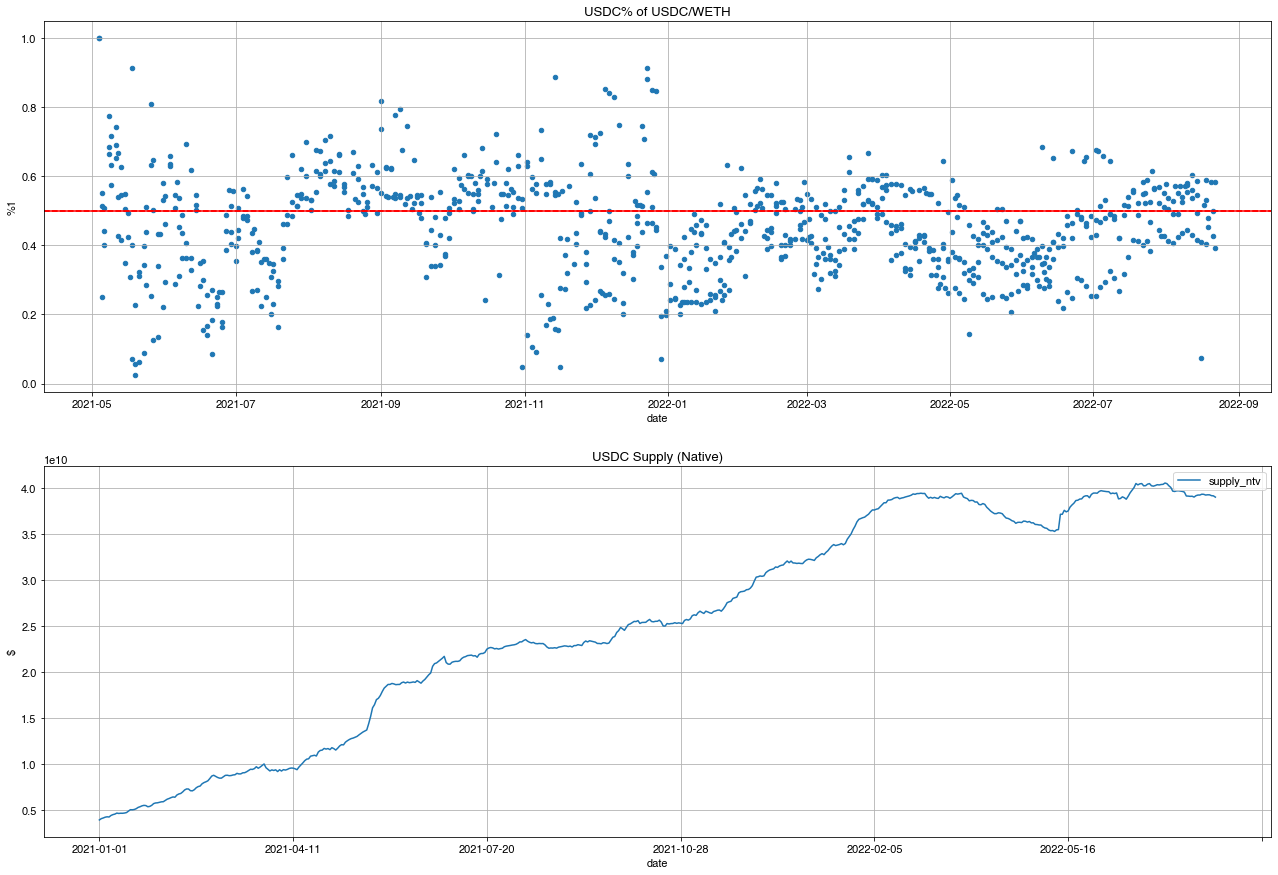

In [1170]:
curr_pool = dex_df[(dex_df['protocol']=='Uniswap')& 
                   (dex_df['pool_name']=='USDC/WETH') & 
                   (dex_df['chain']=='Ethereum') & 
                   (dex_df['protocol_version']=='V3')]

start_dt = '2021-01-01'
end_dt = '2022-07-31'

curr_pool['date'] = pd.to_datetime(curr_pool['date'])
#curr_pool = concat_data(curr_pool, start_dt, end_dt)
#curr_pool['date'] = curr_pool.date.dt.date
#curr_pool = curr_pool.dropna()
#print(curr_pool)

token_1 = curr_pool['token_1'].iloc[50]
token_2 = curr_pool['token_2'].iloc[50]
chain = curr_pool['chain'].iloc[50]

curr_token = stable_df.loc[(stable_df['token']==token_1)
                          & (stable_df['chain']==chain.lower())]
#date_array = pd.date_range('2021-01-01', '2022-07-31')
#date_array = date_array.map(lambda t: t.strftime('%Y-%m-%d'))
#curr_token['date'] = date_array
#curr_token = curr_token.dropna()
curr_token = concat_data(curr_token, start_dt, end_dt)

fig, (ax1, ax2) = plt.subplots(2, figsize = (22,30))

curr_pool.plot.scatter(x = 'date', y= '%1', ax = ax1,  figsize = (22,15), title = (token_1 + "% of "+ token_1 + '/' + token_2))
ax1.axhline(y = 0.5, color = 'r', linestyle = '-')
ax1.axhline(y = 0.5005, color = 'r', linestyle = '--')
ax1.axhline(y = 0.4995, color = 'r', linestyle = '--')
#ax1.axvline(x = datetime(2022,2,1), color = 'g', linestyle = '--')
#ax1.axvline(x = datetime(2022,4,1), color = 'g', linestyle = '--')
ax1.grid()
#start_date = datetime(2021, 3, 2)
#end_date = datetime(2021, 3, 5)
#ax1.set_xlim([start_dt, end_dt])
curr_token.plot(x = 'date', y = 'supply_ntv', figsize = (22,15), ax = ax2, title = token_1 + ' Supply (Native)', ylabel = '$')
ax2.grid()
#ax2.axvline(x = datetime(2022,4,1), color = 'g', linestyle = '--')
#ax2.axvline(x = datetime(2022,2,1), color = 'g', linestyle = '--')
#ax2.axhline(y = 1.5e9, color = 'r', linestyle = '--')

In [1169]:
stable_df[(stable_df['token']=='USDC')&(stable_df['chain']=='polygon')]

,index,# TXs,Agg. # TXs,Unique Senders,Unique Receivers,Unique Users,Vol (Native),Agg. Vol (Native),Mints (Native),Burns (Native),Supply (Native),token,date,chain,supply_ntv
3,2488,2204.0,2204.0,361.0,346.0,387.0,0.000007,0.000007,1.319326e-06,-3.445669e-08,0.000001,USDC,2021-01-01,polygon,0.000001
43,2487,2856.0,5060.0,298.0,286.0,335.0,0.000022,0.000030,2.148953e-07,-1.699054e-07,0.000001,USDC,2021-01-02,polygon,0.000001
62,2486,1714.0,6774.0,236.0,218.0,278.0,0.000005,0.000035,9.617565e-07,-1.901469e-07,0.000002,USDC,2021-01-03,polygon,0.000002
94,2485,2341.0,9115.0,318.0,291.0,362.0,0.000021,0.000056,1.023664e-06,-1.191165e-07,0.000003,USDC,2021-01-04,polygon,0.000003
98,2484,2202.0,11317.0,313.0,296.0,357.0,0.000010,0.000067,1.124796e-06,-3.393455e-07,0.000004,USDC,2021-01-05,polygon,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13746,2493,143576.0,28070368.0,16163.0,18838.0,22582.0,0.000549,0.193027,6.900860e-06,-2.856580e-06,0.000509,USDC,2022-07-27,polygon,0.000509
13755,2492,168241.0,28238609.0,18214.0,23406.0,27273.0,0.000660,0.193687,2.138950e-05,-1.249820e-06,0.000530,USDC,2022-07-28,polygon,0.000530
13789,2491,176313.0,28414922.0,21312.0,23738.0,27677.0,0.000620,0.194307,1.939090e-06,-2.125080e-06,0.000529,USDC,2022-07-29,polygon,0.000529
13816,2490,129912.0,28544834.0,19412.0,21453.0,25207.0,0.000438,0.194745,6.721400e-07,-5.555760e-06,0.000525,USDC,2022-07-30,polygon,0.000525


In [1160]:
curr_pool = dex_df[(dex_df['protocol']=='Uniswap')& 
                   (dex_df['pool_name']=='USDC/WETH') & 
                   (dex_df['chain']=='Polygon') & 
                   (dex_df['protocol_version']=='V3')]
curr_pool

,date,protocol,chain,protocol_version,pool_name,token_1,token_1_balance,token_1_value_USD,token_2,token_2_balance,token_2_value_USD,token_3,token_3_balance,token_4,token_4_balance,daily_revenue,TVL,ideal,%1,%2
165121,2021-12-20,Uniswap,Polygon,V3,USDC/WETH,USDC,6.466236e+02,0.0,WETH,0.254926,0.0,NaN,NaN,NaN,NaN,0.000000,6.466236e+02,NaN,1.000000,0.000394
165122,2021-12-20,Uniswap,Polygon,V3,USDC/WETH,USDC,2.000000e+00,0.0,WETH,0.000486,0.0,NaN,NaN,NaN,NaN,0.000000,2.000000e+00,NaN,1.000000,0.000243
165820,2021-12-21,Uniswap,Polygon,V3,USDC/WETH,USDC,9.899999e+00,0.0,WETH,0.002661,0.0,NaN,NaN,NaN,NaN,0.000000,9.899999e+00,NaN,1.000000,0.000269
165845,2021-12-21,Uniswap,Polygon,V3,USDC/WETH,USDC,4.555382e+04,0.0,WETH,7.812319,0.0,NaN,NaN,NaN,NaN,14.072522,7.694720e+04,NaN,0.592014,0.000102
165850,2021-12-21,Uniswap,Polygon,V3,USDC/WETH,USDC,4.420956e+02,0.0,WETH,0.000525,0.0,NaN,NaN,NaN,NaN,0.000000,4.420956e+02,NaN,1.000000,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289092,2022-08-20,Uniswap,Polygon,V3,USDC/WETH,USDC,4.202458e+06,0.0,WETH,4574.181973,0.0,NaN,NaN,NaN,NaN,18882.389829,1.141003e+07,NaN,0.368313,0.000401
289341,2022-08-21,Uniswap,Polygon,V3,USDC/WETH,USDC,4.722052e+02,0.0,WETH,0.267957,0.0,NaN,NaN,NaN,NaN,14.333324,9.056272e+02,NaN,0.521412,0.000296
289355,2022-08-21,Uniswap,Polygon,V3,USDC/WETH,USDC,1.475161e+06,0.0,WETH,1110.269134,0.0,NaN,NaN,NaN,NaN,5355.622220,3.272234e+06,NaN,0.450812,0.000339
289474,2022-08-21,Uniswap,Polygon,V3,USDC/WETH,USDC,4.898435e+06,0.0,WETH,4254.786324,0.0,NaN,NaN,NaN,NaN,17190.787242,1.178385e+07,NaN,0.415691,0.000361
